<a href="https://colab.research.google.com/github/NRTPRIME/EDA-Capstone-Project-1-/blob/main/Airline_Paasenger_Referral_Prediction(Nandan_Prabhutendolkar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airline Paasenger Referral Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**


The "Airline Passenger Referral Prediction" project aims to develop a classification model that predicts whether a passenger will refer the airline to others based on their travel experience. The prediction will be binary, indicating whether a passenger is likely to recommend the airline (positive class) or not (negative class).

**Objective:**

The primary goal is to enhance customer satisfaction and loyalty by identifying passengers who are more likely to refer the airline to others. By understanding the factors influencing positive referrals, the airline can tailor its services to meet customer expectations and improve overall passenger experience.

Dataset:

The project will utilize a dataset containing historical information about airline passengers, including details such as flight preferences, on-board services usage, customer feedback, and previous referral behavior. The dataset will be split into training and testing sets to develop and evaluate the predictive model.

**Methodology:**

**Data Preprocessing:**

1.  Cleaning and handling missing data.
2.  Feature engineering to extract relevant information.
3.  Encoding categorical variables.
4.  Scaling numerical features if necessary.

**Exploratory Data Analysis (EDA):**

1.  Understanding the distribution of key features.
2.  Exploring correlations between features and referral behavior.
3.  Identifying patterns and trends in the data.

**Feature Selection:**

1.  Selecting the most relevant features for model training.
2.  Eliminating redundant or irrelevant features.

**Model Selection:**

1.  Choosing classification algorithms suitable for the problem.
2.  Training multiple models and evaluating their performance.

**Model Training:**

1.  Utilizing the training dataset to teach the model to recognize patterns in the data.
2.  Fine-tuning hyperparameters for optimal performance.

**Model Evaluation:**

1.  Assessing the model's performance on the testing dataset.
Metrics include accuracy, precision, recall, F1 score, and area under the ROC curve.

**Interpretability:**

1.  Analyzing feature importance to understand which factors contribute most to passenger referral predictions.
2.  Providing insights into actionable improvements based on the model's findings.

**Deployment:**

1.  Integrating the trained model into the airline's operational systems for real-time predictions.
2.  Implementing a feedback loop to continuously update and improve the model.

**Benefits:**

1.  Improved understanding of factors influencing passenger referrals.
2.  Targeted strategies for enhancing services based on predictive insights.
3.  Increased customer satisfaction and loyalty.
4.  Efficient allocation of resources to areas that most impact passenger experience.

**Challenges:**

1.  Handling imbalanced classes in the referral prediction.
2.  Ensuring the model's interpretability for effective decision-making.
3.  Adapting to changing customer preferences and market dynamics.

# **GitHub Link -**

GitHub Link :- https://github.com/NRTPRIME/ML-capstone--Airline-Paasenger-Referral-Prediction

# **Problem Statement**


Airlines face challenges in understanding and predicting factors influencing passenger referrals. This project aims to develop a predictive model to identify passengers likely to recommend the airline, addressing issues such as inefficient resource allocation, high customer acquisition costs, and the need for a competitive advantage. The objective is to enhance customer satisfaction, optimize resource allocation, and leverage positive word-of-mouth referrals for improved operational efficiency and market competitiveness.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [100]:
! pip install vaderSentiment
! pip install shap
! pip install fancyimpute

# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

#libraries for model building
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from fancyimpute import IterativeImputer

#libraries for model evalution
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score,precision_score

### Dataset Loading

In [101]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
#Load Dataset
airline_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ML capstone/ML-Capstone/data_airline_reviews .xlsx')

### Dataset First View

In [103]:
# Dataset first look
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [104]:
# Dataset Rows & Columns count
airline_df.shape

(131895, 17)

The dataset contains a total of 131,895 rows and comprises 17 columns.

### Dataset Information

In [105]:
# Dataset Info
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [106]:
# Dataset Duplicate Value Count
airline_df.duplicated().value_counts()

True     70711
False    61184
dtype: int64


There are 70,711 instances of duplicate data within the provided dataframe.

#### Missing Values/Null Values


Upon reviewing the last 5 rows, it is evident that the dataset contains null values. To assess the extent of missing data, let's examine the count of null values for each column in this extensive dataset.

In [107]:
#Checking the null value count for each column
airline_df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

<Axes: >

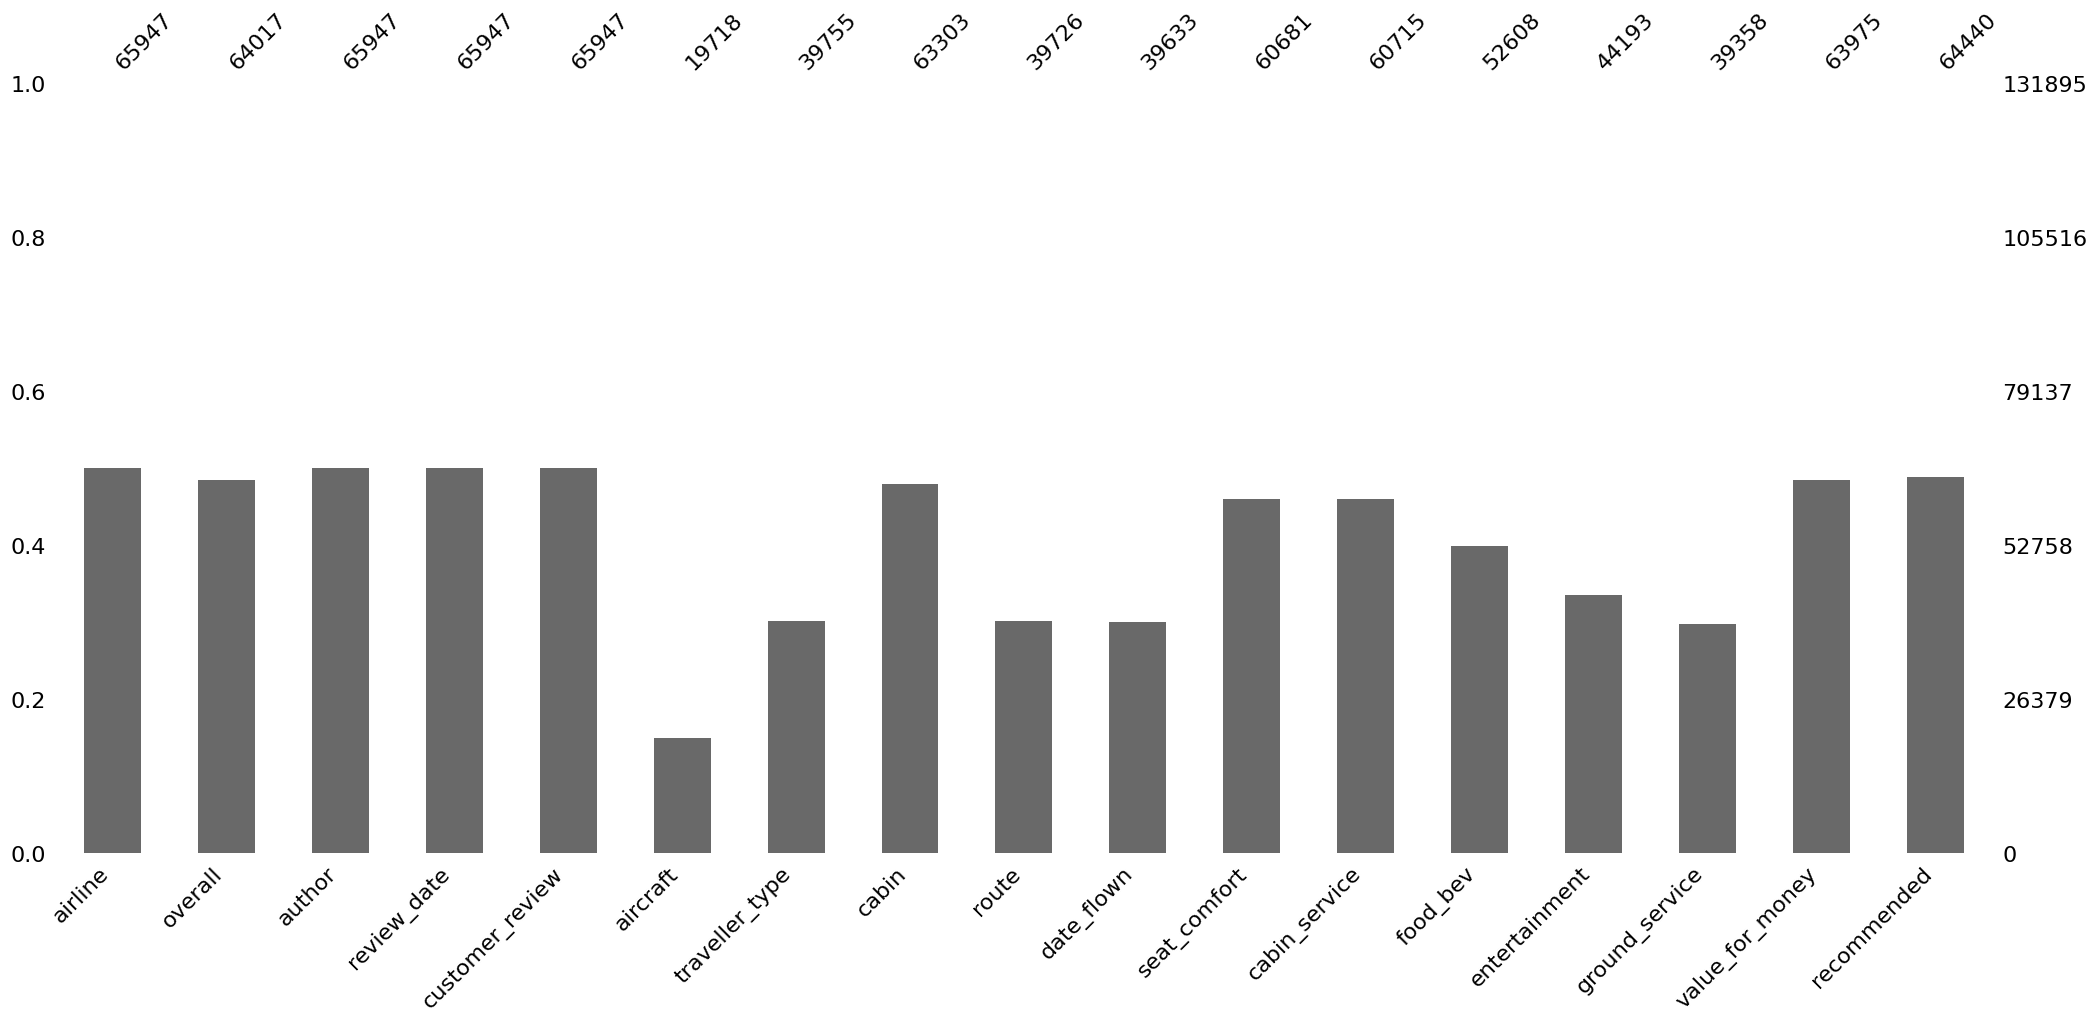

In [108]:
# Visualizing the missing values
msno.bar(airline_df)


The bar graph above illustrates the prevalence of missing values in the dataset. It is evident that a considerable number of data points are not available for all the columns.

### What did you know about your dataset?


*   The dataset comprises a total of 131,895 observations, and it includes 17 distinct features.

*   Notably, features such as aircraft, author, and airline exhibit null values, indicating incomplete data for these specific attributes.

*   Within the dataset, there are 70,711 instances of duplicate data, highlighting the presence of redundant observations.



## ***2. Understanding Your Variables***

In [109]:
# Dataset Columns
print(f'Features: {airline_df.columns.to_list()}')

Features: ['airline', 'overall', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended']


In [110]:
# Dataset Describe
airline_df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,64017.0,5.145430,3.477532,1.0,1.0,5.0,9.0,10.0
seat_comfort,60681.0,2.952160,1.441362,1.0,1.0,3.0,4.0,5.0
cabin_service,60715.0,3.191814,1.565789,1.0,2.0,3.0,5.0,5.0
food_bev,52608.0,2.908170,1.481893,1.0,1.0,3.0,4.0,5.0
entertainment,44193.0,2.863372,1.507262,1.0,1.0,3.0,4.0,5.0
ground_service,39358.0,2.692820,1.612215,1.0,1.0,3.0,4.0,5.0
value_for_money,63975.0,2.943962,1.587370,1.0,1.0,3.0,4.0,5.0


### Variables Description

• airline:Name of the airline

• overall : Overall point is given to the trip between 1 to 10.

• author : Author of the trip

• review_date : Date of the Review

• customer_review : Review of the customers in free text format

• aircraft : Type of the aircraft

• traveller_type : Type of traveller(e.g. business,lesisure)

• cabin : Cabin at the flight date flowan: Flight date

• seat_comfort : Rated between 1-5

• cabin_service : Rated between 1-5

• food_bev : Rated between 1-5

• entertainment : Rated between 1-5

• ground_service : Rated between 1-5

• value_for_money : Rated between 1-5

• recommended : Binary, target variable

### Check Unique Values for each variable.

In [111]:
# Check Unique Values for each variable.
for i in airline_df.columns.tolist():
  print(f'Number of unique value in {i} is {airline_df[i].nunique()}.')

Number of unique value in airline is 81.
Number of unique value in overall is 10.
Number of unique value in author is 44069.
Number of unique value in review_date is 3015.
Number of unique value in customer_review is 61172.
Number of unique value in aircraft is 2088.
Number of unique value in traveller_type is 4.
Number of unique value in cabin is 4.
Number of unique value in route is 24549.
Number of unique value in date_flown is 63.
Number of unique value in seat_comfort is 5.
Number of unique value in cabin_service is 5.
Number of unique value in food_bev is 5.
Number of unique value in entertainment is 5.
Number of unique value in ground_service is 5.
Number of unique value in value_for_money is 5.
Number of unique value in recommended is 2.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [112]:
#Creating a copy before the data preparation and analysis
airline_df_copy =airline_df.copy()

####Droping the duplicates values

In [113]:
# finding the duplicates values
airline_df.duplicated().sum()

70711

In [114]:
# droping the duplicates values
airline_df.drop_duplicates(inplace = True)

In [115]:
airline_df.duplicated().sum()

0

####Handeling null values

In [116]:
# function for finding Missing values :
def missing_values_check(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
    missing_values_df = missing_values_df.sort_values('percent_missing', ascending=False).reset_index(drop=True)
    return missing_values_df

In [117]:
# Percentage of missing values :
result = missing_values_check(airline_df)
result.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
column_name,aircraft,ground_service,date_flown,route,traveller_type,entertainment,food_bev,seat_comfort,cabin_service,cabin,value_for_money,overall,recommended,customer_review,review_date,author,airline
percent_missing,69.78295,39.250458,38.817338,38.688219,38.64409,34.247516,20.990782,8.127942,8.080544,4.051713,3.035107,2.914161,2.325771,0.001634,0.001634,0.001634,0.001634


In light of the findings from the previous analysis, it is
evident that our dataset is characterized by a substantial number of null values. To gain a more focused understanding, the null value count will be examined with respect to the target variable 'recommended' first.

In [118]:
# Let's create a dataset where columns contain null values in respect to 'recommended' column
recommended_nullvalues = airline_df[airline_df['recommended'].isnull()]

In [119]:
recommended_nullvalues.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Turkish Airlines,1.0,Deepa Acharya,6th April 2019,âœ… Trip Verified | Lagos to Istanbul via Kath...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,Turkish Airlines,1.0,B Marten,7th February 2019,âœ… Trip Verified | Seychelles to Birmingham v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,Turkish Airlines,8.0,David Jackson,8th January 2019,âœ… Trip Verified | London to Bangkok via Ista...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,Turkish Airlines,1.0,Gordon Turpin,8th January 2019,âœ… Trip Verified | At check-in in Johannesbur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
# count of null values in the new dataset
airline_df['recommended'].isnull().sum()

1423

In [121]:
# Let's drop the Null values of all columns with respect to 'recommended' column
airline_df.drop(airline_df[airline_df['recommended'].isnull()].index , inplace = True)

In [122]:
# Function to check the null value percentage
missing_values_check(airline_df).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
column_name,aircraft,ground_service,date_flown,route,traveller_type,entertainment,food_bev,seat_comfort,cabin_service,overall,cabin,value_for_money,airline,customer_review,review_date,author,recommended
percent_missing,69.065109,37.803919,37.360486,37.229966,37.184786,32.681849,19.109453,5.940329,5.891802,2.951758,1.768712,0.726226,0.0,0.0,0.0,0.0,0.0


##### Droping columns with higher missing data or which are not needed

aircraft -  aircraft feature has highest null values more than 60%

Route - Not needed for building a model as it is independent of the Services and Quality of travel.

Date_flown - Not needed for building a model as it is not a time series data, also some common time period is there between 2 dates.


In [123]:
#drop unnecessary columns,which are not for our use
airline_df.drop(['aircraft', 'route', 'date_flown'], axis=1, inplace=True)

In [124]:
result = missing_values_check(airline_df)
result.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
column_name,ground_service,traveller_type,entertainment,food_bev,seat_comfort,cabin_service,overall,cabin,value_for_money,airline,author,review_date,customer_review,recommended
percent_missing,37.803919,37.184786,32.681849,19.109453,5.940329,5.891802,2.951758,1.768712,0.726226,0.0,0.0,0.0,0.0,0.0


#####Imputation for categorial Columns:



Since traveller_type and cabin are categorial value and there is no possible way to identify what this null value could be, therefore trying to replace null values using mode since mode is best way to replace categorial value.

In [125]:
#replacing null value in traveller_type and cabin using mode
for col in ['traveller_type', 'cabin']:
    airline_df[col].fillna(airline_df[col].mode()[0], inplace=True)

In [126]:
result = missing_values_check(airline_df)
result.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
column_name,ground_service,entertainment,food_bev,seat_comfort,cabin_service,overall,value_for_money,airline,author,review_date,customer_review,traveller_type,cabin,recommended
percent_missing,37.803919,32.681849,19.109453,5.940329,5.891802,2.951758,0.726226,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#####**Imputation for Numerical Columns:**

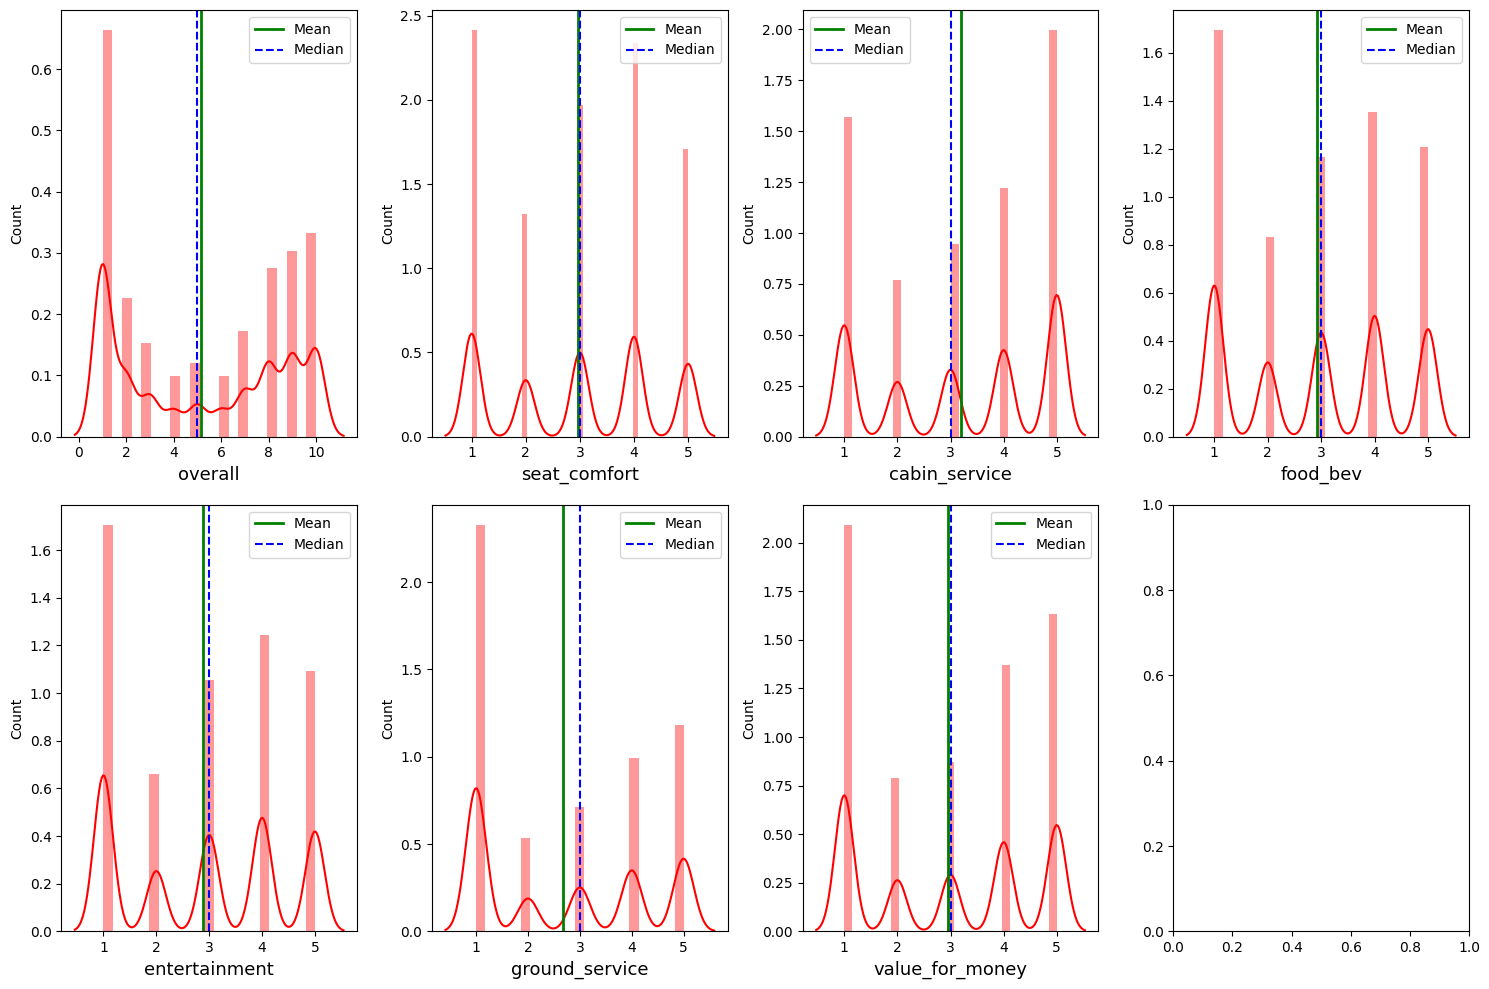

In [127]:
#checking the distribution of imputed columns is same or not
columns_to_visualize = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each column and plot the distribution
for i, col in enumerate(columns_to_visualize):
    sns.distplot(airline_df[col], color='r', ax=axes[i])
    axes[i].set_xlabel(col, fontsize=13)
    axes[i].set_ylabel('Count')

    # Plotting the mean and the median.
    axes[i].axvline(airline_df[col].mean(), color='green', linewidth=2, label='Mean')
    axes[i].axvline(airline_df[col].median(), color='blue', linestyle='dashed', linewidth=1.5, label='Median')

    # Add legend to each subplot
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [128]:
# DataFrame with numerical multimodal data
numerical_multimodal_columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']
# Create an IterativeImputer instance
imputer = IterativeImputer()

# Perform imputation on the selected columns
airline_df[numerical_multimodal_columns] = imputer.fit_transform(airline_df[numerical_multimodal_columns])

In [129]:
result = missing_values_check(airline_df)
result.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
column_name,airline,overall,author,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
percent_missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


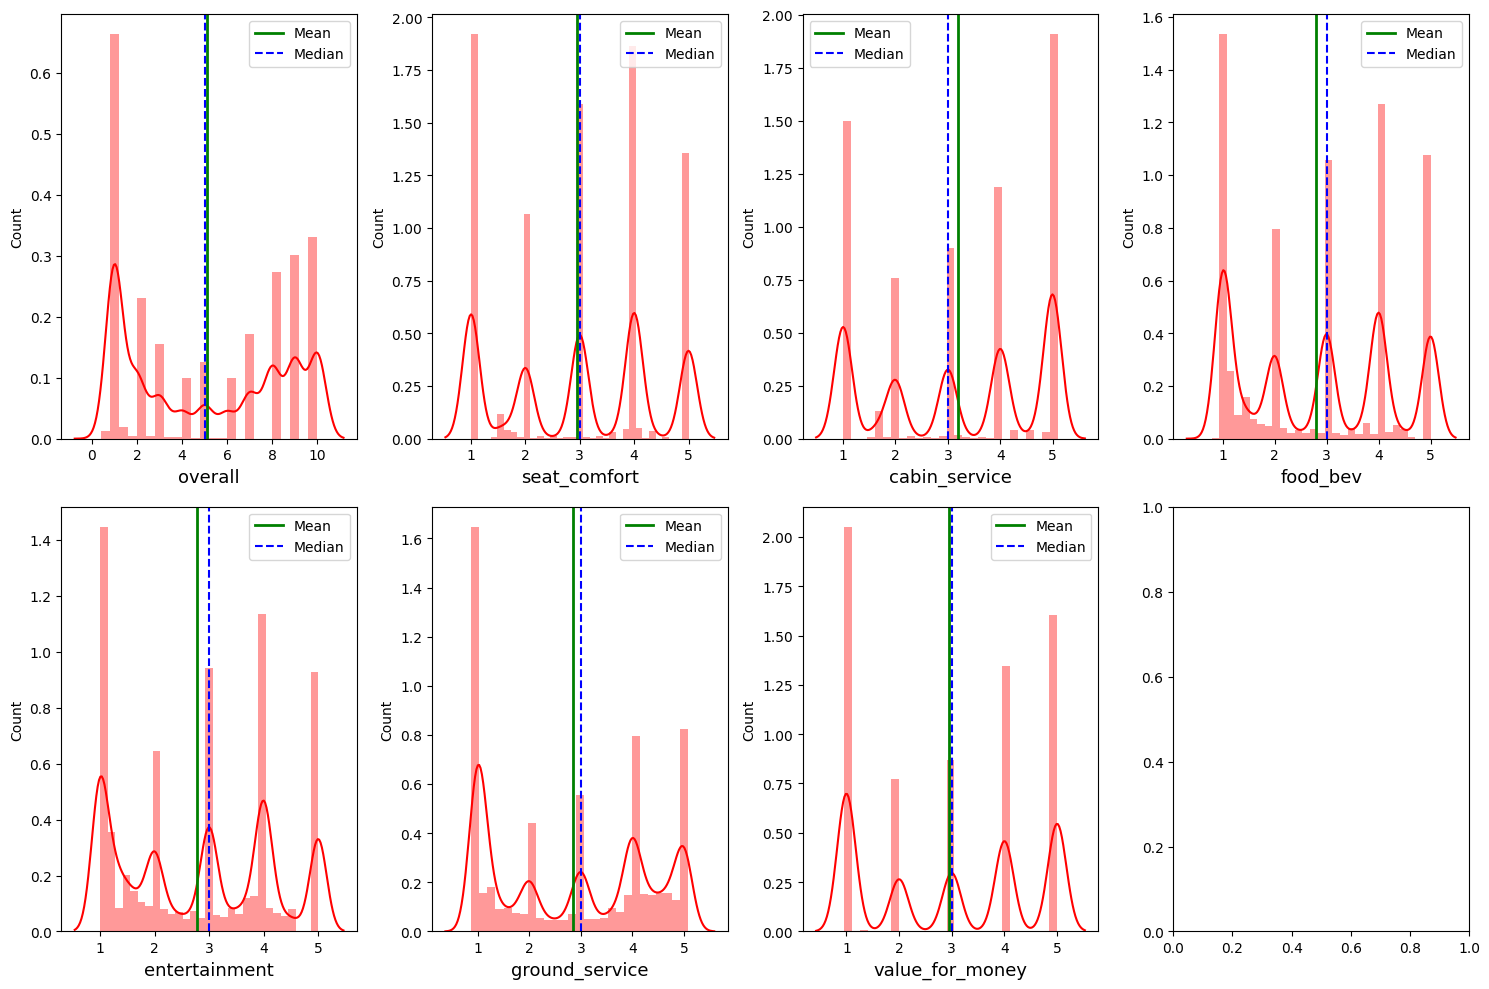

In [130]:
#checking the distribution of imputed columns is same or not
columns_to_visualize = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each column and plot the distribution
for i, col in enumerate(columns_to_visualize):
    sns.distplot(airline_df[col], color='r', ax=axes[i])
    axes[i].set_xlabel(col, fontsize=13)
    axes[i].set_ylabel('Count')

    # Plotting the mean and the median.
    axes[i].axvline(airline_df[col].mean(), color='green', linewidth=2, label='Mean')
    axes[i].axvline(airline_df[col].median(), color='blue', linestyle='dashed', linewidth=1.5, label='Median')

    # Add legend to each subplot
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

The imputation method employed does not alter the distribution of the dataset, as observed.

Convert values in specified columns to whole numbers

In [131]:
columns_to_convert = ['overall', 'seat_comfort' ,'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Convert values in specified columns to whole numbers
airline_df[columns_to_convert] = airline_df[columns_to_convert].astype(int)

####Comparing the size of the cleaned dataset with the original dataset

In [132]:
# Comparing the size of the cleaned dataset with the original dataset and calculating the percentage change
percentage_change = (len(airline_df) / len(airline_df_copy)) * 100

# Displaying the percentage change
print(f"The cleaned dataset size is {percentage_change:.2f}% of the original dataset.")

The cleaned dataset size is 45.31% of the original dataset.


### What all manipulations have you done and insights you found?

Let's summarize the manipulations performed and insights derived from the analysis:

**Data Manipulations:**

1.  Duplicate Removal: Identified and removed 70,711 duplicate rows from the dataset to ensure data integrity.
2.  Null Value Handling : Addressed null values, particularly in the 'recommended' column, by removing rows with missing values.
3.  Handling Categorical Null Values - Traveller Type and Cabin: For the 'Traveller_Type' and 'Cabin' columns, which are categorical, null values have been replaced using the mode (most frequent category). This is a reasonable approach when the nature of missingness is unknown, and mode imputation provides a simple way to handle categorical data.

4.  Handling Numerical Multimodal Data - MICE Algorithm: For numerical multimodal data, the Multivariate Imputation by Chained Equations (MICE) algorithm has been used. This method helps impute missing values in a way that preserves the multimodal nature of the data and doesn't significantly alter the distribution

**Insights Derived:**

1.  Dataset Overview : The original dataset consisted of 131,895 rows and 17 columns consisted of 22,819 rows and 16 columns.

2.  Missing Values : Null values were observed, particularly in columns such as 'aircraft,' 'author,' and 'airline.'
The missing values were evaluated with a focus on the 'recommended' column, essential for the predictive task.

3.  Data Cleaning Impact : After handling duplicates and null values, the dataset was considered cleaned.
The cleaned dataset is 45.31 percentage of the original dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1   visualize the distribution of different traveler types

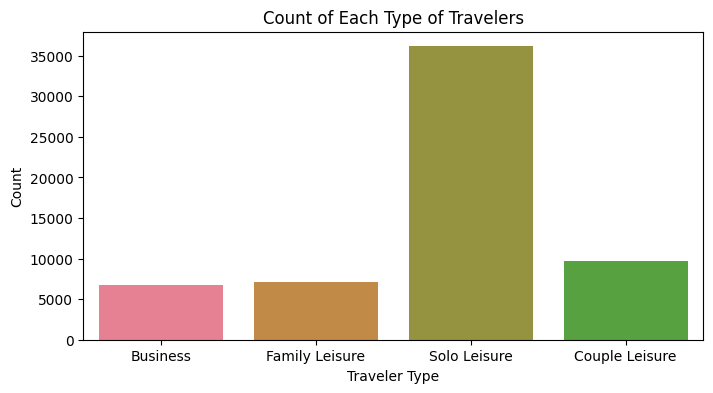

In [ ]:
# Chart - 1: Count of each type of travelers

# Defining a custom color palette
colors = sns.color_palette("husl", 9)

# Plotting the count plot with the specified color palette
plt.figure(figsize=(8, 4))
sns.countplot(x='traveller_type', data=airline_df, palette=colors)
plt.title("Count of Each Type of Travelers")
plt.xlabel("Traveler Type")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?






 Count plots are suitable for categorical data, providing a clear representation of the frequency of each category. In this context, it effectively illustrates the count of each traveler type, aiding in understanding the distribution

##### 2. What is/are the insight(s) found from the chart?


The dataset exhibits a predominant number of reviews from solo leisure travelers, surpassing 35,000, with couple leisure travelers following behind more than 10,000. In contrast, both business and family leisure travelers contribute fewer reviews, and notably, their counts are approximately equal.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights gained from analyzing traveler types, particularly the dominance of solo leisure travelers, can positively impact the airline business. By tailoring marketing strategies, improving services for specific traveler segments, targeting engagement, optimizing operations, and enhancing the overall customer experience, airlines can strategically position themselves in the market and foster positive business outcomes

#### Chart - 2  The proportion of each traveler type in the overall distribution.

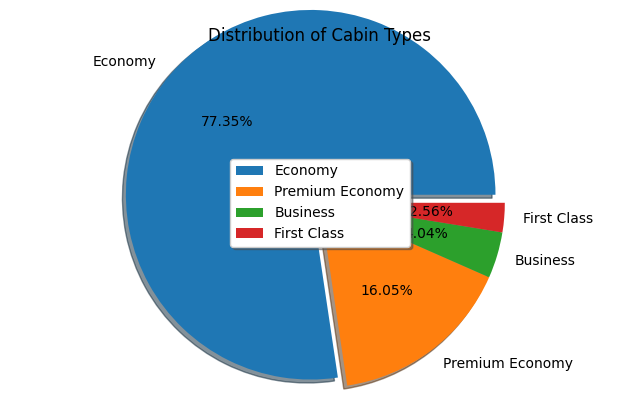

In [ ]:
# Chart - 2 visualization code
# Get the number of passengers for each cabin class through pie chart visualization
label_for_cabin = ['Economy', 'Premium Economy', 'Business', 'First Class']
data1 = airline_df['cabin'].value_counts().values
explode = [0.1, 0, 0, 0]

plt.figure(figsize=(8,4))
plt.axis("equal")
plt.pie(data1, labels=label_for_cabin, explode=explode, radius=1.5, autopct='%0.2f%%', shadow=True, textprops={'fontsize': 10})
plt.legend(loc='center', shadow=True, fancybox=True)
plt.title("Distribution of Cabin Types")
plt.show()


##### 1. Why did you pick the specific chart?

The pie chart allows for a clear representation of the proportion of each cabin type relative to the whole. It helps visualize the distribution and easily compare the sizes of different segments.

##### 2. What is/are the insight(s) found from the chart?

The preeminent portion of reviewers has experienced the Economy Class, constituting 77.35 % of the total, followed by the Premium Economy Class. In contrast, the representation of first-class cabin reviewers is notably the lowest among the observed categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing that a significant portion of reviewers has experienced the Economy Class is valuable. This information can help the airline understand its customer base and tailor services, amenities, or marketing strategies to enhance the experience for Economy Class passengers.The insights into the distribution of reviewers across cabin classes provide valuable information for optimizing services, tailoring marketing strategies, and maximizing revenue. This knowledge can enhance customer satisfaction, improve operational efficiency, and contribute to a positive impact on the airline's business.

#### Chart - 3 Visualizing the recommendation count



<Axes: xlabel='recommended', ylabel='count'>

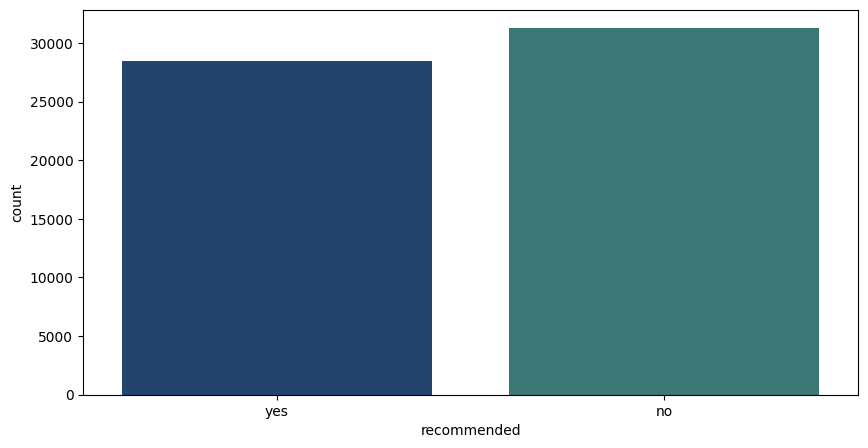

In [ ]:
# Chart - 3 visualization code
#Visualizing the recommendation count
sns.set_palette('gist_earth')
plt.figure(figsize=(10,5))
sns.countplot(x = 'recommended', data = airline_df)

##### 1. Why did you pick the specific chart?

Bar charts are straightforward and intuitive for interpreting the magnitude of differences in counts. The length of the bars directly represents the quantity, facilitating a quick understanding of the data.

##### 2. What is/are the insight(s) found from the chart?

Based on the visual representation above, the disparity between the number of recommendations and non-recommendations is not notably substantial, despite the higher count in the "not recommended" category. Over 29,000 individuals have expressed recommendations for the airline, indicating a sizable positive sentiment among reviewers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights derived from the comparison of recommendations and non-recommendations, despite the higher count in "not recommended," can contribute to a positive business impact. Understanding the sentiment distribution provides an opportunity for targeted improvements, enhancing customer satisfaction, and potentially influencing positive reviews, which in turn can positively impact the airline's reputation and customer loyalty.

#### Chart - 4 Top 10 airlines with most reviews

Text(0.5, 1.0, 'Airline Count Distribution')

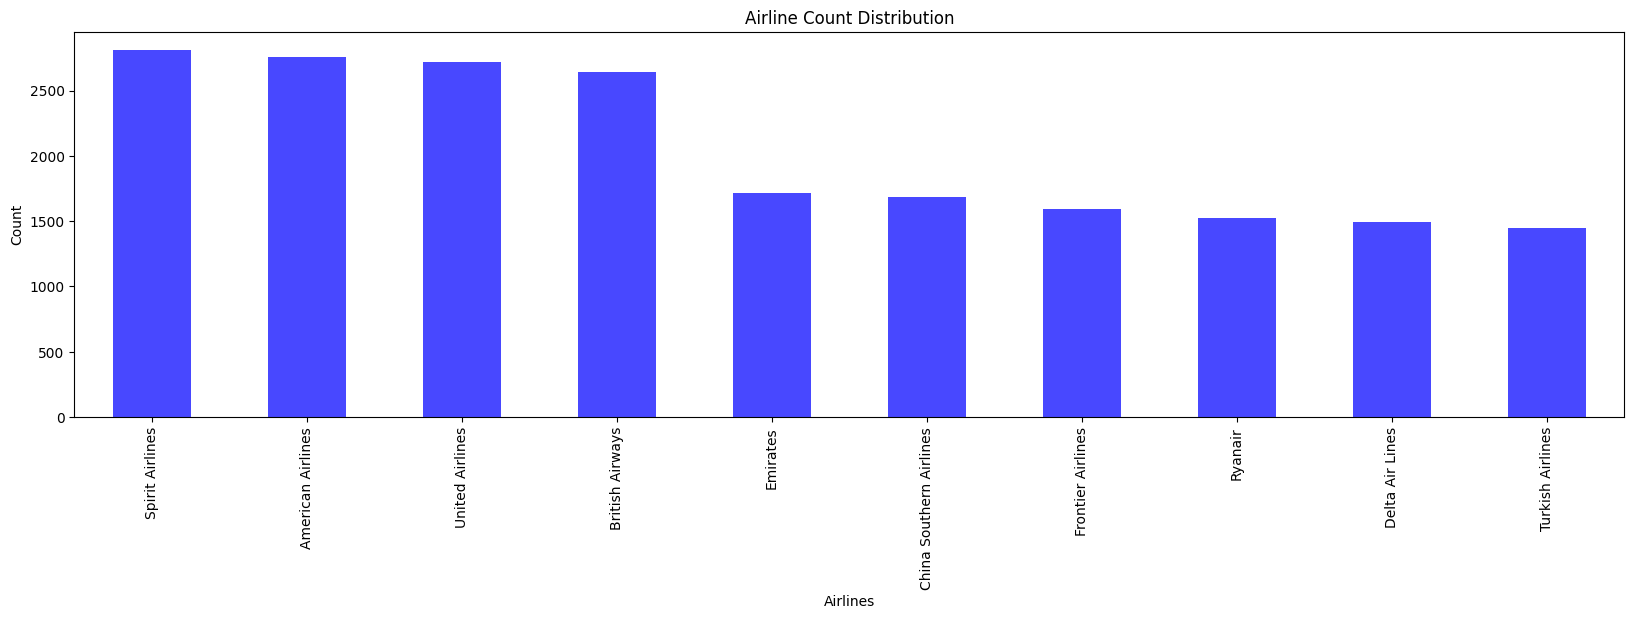

In [ ]:
# Chart - 4 visualization code
# Visualize the top 10 airlines with most reviews
plt.figure(figsize=(20,5))
sns.set_palette("bwr")
airline_df['airline'].value_counts().nlargest(10).plot(kind="bar")
plt.xlabel("Airlines")
plt.ylabel("Count")
plt.title("Airline Count Distribution")

##### 1. Why did you pick the specific chart?

The goal is to visualize the top 10 airlines with the highest number of occurrences. A bar plot is effective for highlighting these top categories and showing their relative counts.

##### 2. What is/are the insight(s) found from the chart?

It is evident that Spirit Airlines emerges as the most popular airline, closely followed by American Airlines, based on the count of reviews. This observation underscores the prominence of these two airlines within the dataset, highlighting their substantial representation in terms of customer feedback and reviews. Understanding the popularity and standing of American Airlines and United Airlines can serve as a focal point for further investigation into the factors contributing to their positive reception or areas that may warrant attention for improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive reviews and popularity contribute to a favorable brand perception. Airlines can leverage this information to reinforce positive aspects of their brand and further build customer trust.Knowing which airlines are most popular provides valuable insights for tailoring marketing strategies. Efforts can be focused on promoting the strengths and unique selling propositions of these airlines.

#### Chart - 5  Top 10 airlines with least reviews

Text(0.5, 1.0, 'Airline Count Distribution')

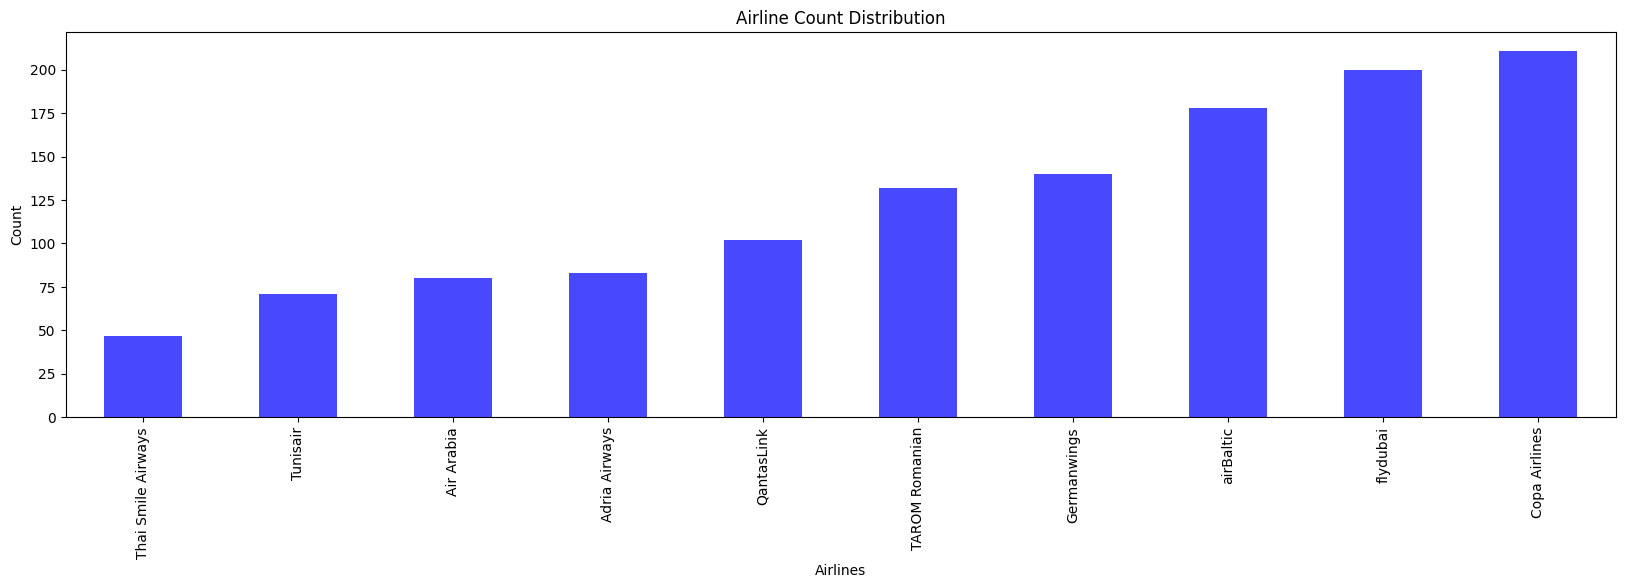

In [ ]:
# Chart - 5 visualization code
# Visualize the top 10 airlines with least reviews
plt.figure(figsize=(20,5))
sns.set_palette("bwr")
airline_df['airline'].value_counts().nsmallest(10).plot(kind="bar")
plt.xlabel("Airlines")
plt.ylabel("Count")
plt.title("Airline Count Distribution")

##### 1. Why did you pick the specific chart?

The goal is to visualize the bottom 10 airlines with the least number of reviews. A bar plot is effective for highlighting these bottom categories and showing their relative counts.

##### 2. What is/are the insight(s) found from the chart?

 Understanding the position of The smile airways and Tunisair with the lowest review counts provides a foundation for strategic considerations, allowing these airlines to enhance their market presence and actively engage with customers for valuable feedback.The smile airways and Tunisair, with the lowest review counts, appear to have a more limited presence in terms of customer feedback compared to other airlines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The potential negative impact lies in the failure to address the challenges associated with lower review counts, which could affect brand exposure, customer trust, and overall growth. Proactive efforts to enhance visibility and address customer needs are crucial for mitigating potential negative consequences.

#### Chart - 6 Is it Solo Leisure worth for Money ?

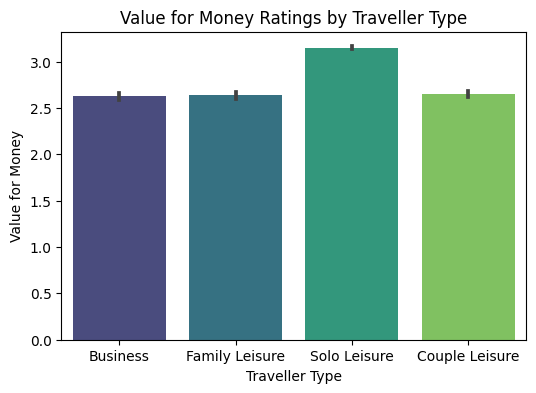

In [ ]:
# Chart - 6 visualization code
# Setting the figure size and plotting the graph with a vibrant color palette
plt.figure(figsize=(6, 4))
sns.barplot(x=airline_df['traveller_type'], y=airline_df['value_for_money'], palette="viridis")

# Adding labels and title
plt.xlabel("Traveller Type")
plt.ylabel("Value for Money")
plt.title("Value for Money Ratings by Traveller Type")

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

The interpretation depends on the specific values and distribution of the ratings within the  category. You can visually assess the height of the bar and compare it to others to make qualitative judgments about the perceived value for money for solo leisure travelers.

##### 2. What is/are the insight(s) found from the chart?

The insight derived from the chart "Value for Money Ratings by Traveller Type" is that, on average, individuals categorized as "Solo Leisure" travelers tend to give the highest ratings for value for money compared to other traveler types. This suggests that, based on the data, solo leisure travelers find the airline services to be particularly worth the money.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The airline can develop targeted marketing strategies to specifically appeal to solo leisure travelers. Highlighting features or services that resonate well with this demographic can attract more customers in this category.

Understanding the preferences of solo leisure travelers allows the airline to tailor its services to meet the unique needs of this customer segment. This, in turn, can lead to an enhanced overall customer experience.

Leveraging the insight can provide a competitive advantage. If the airline can consistently deliver value for money to solo leisure travelers, it can differentiate itself in the market and attract a loyal customer base.

#### Chart - 7 Variation of Recommendation feature with Seat comfort

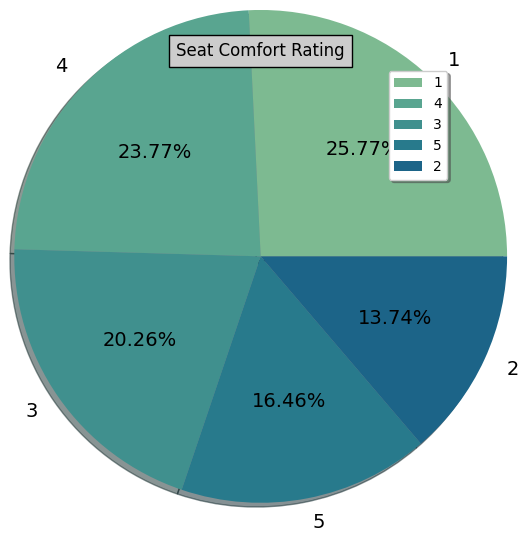

In [135]:
# Assuming 'airline_df' is your DataFrame with a 'seat_comfort' column
data4 = airline_df['seat_comfort'].value_counts().values
label_for_seat_comfort = airline_df['seat_comfort'].value_counts().index.astype(str)

# Ensure that both lists have the same length
if len(label_for_seat_comfort) == len(data4):
    plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
    plt.axis("equal")
    plt.title('Seat Comfort Rating', bbox={'facecolor': '0.8', 'pad': 5})
    plt.pie(data4, labels=label_for_seat_comfort, radius=1.6, autopct='%0.2f%%', shadow=True, textprops={'fontsize': 14})
    plt.legend(loc='upper right', shadow=True, fancybox=True)  # Adjust legend position as needed
    plt.show()



##### 1. Why did you pick the specific chart?

This visualization effectively represents the distribution of "Seat Comfort" ratings with each rating's percentage share. The use of a pie chart allows for a quick overview of the proportion of different ratings within the dataset.

##### 2. What is/are the insight(s) found from the chart?

The data indicates that for seat comfort, individuals have provided the highest positive recommendations for class 5 seats, contrasting with a notably low occurrence of negative recommendations for the same class.

Conversely, seat class 1 receives the highest negative recommendations compared to its positive ones, suggesting a potential issue that should be addressed promptly. Consideration should be given to the removal or improvement of class 1 seats to enhance overall customer satisfaction.

A more than quarter of respondents express dissatisfaction with seat comfort, assigning a rating of 1.0. This signals a critical area for improvement, emphasizing the need for adjustments to enhance comfort in these instances.

A substantial 40% of individuals provide ratings of 4.0 and 5.0 for seat comfort, indicating a predominantly positive sentiment. This overall positive rating for seat comfort services is likely to positively influence the airline business, as customer satisfaction in this area appears to be a significant strength. Efforts to maintain and further improve seat comfort can contribute positively to the airline's reputation and customer loyalty.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recognizing that a substantial percentage (42%) of customers provide high ratings (4.0 and 5.0) for seat comfort allows the airline to identify a key strength. The business can optimize resources and efforts to maintain or further improve seat comfort services, aligning with customer preferences.

#### Chart - 8 Percentage of overall rating by passenger

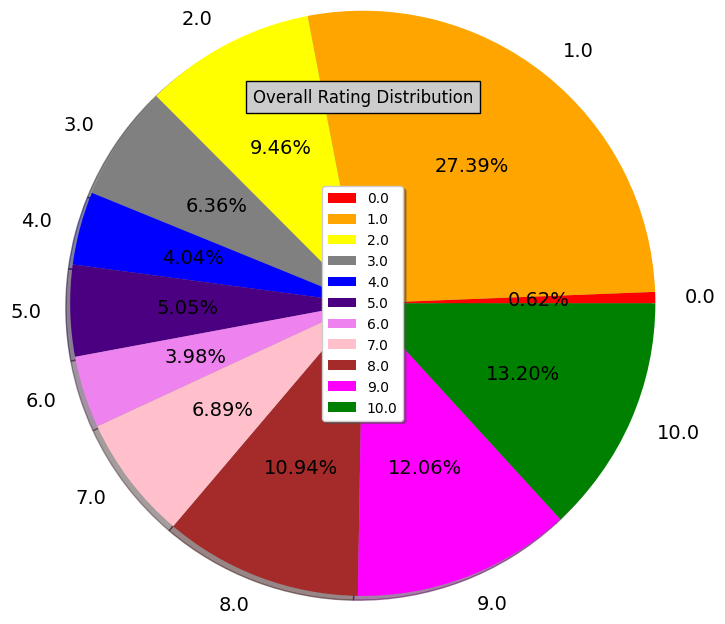

In [45]:
# Chart - 8 visualization code
# setting the fig size and plotting the graph
airline_df['overall'] = airline_df['overall'].astype(int)
label_for_overall_rating = ['0.0','1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
data8 = airline_df['overall'].value_counts().sort_index().values  # Sorting the data

# Define colors for each slice
colors = ['red', 'orange', 'yellow', 'grey', 'blue', 'indigo', 'violet', 'pink', 'brown', 'magenta', 'green']

plt.figure(figsize=(5, 5))
plt.title('Overall Rating Distribution', bbox={'facecolor': '0.8', 'pad': 5})
plt.pie(data8, labels=label_for_overall_rating, radius=1.9, autopct='%0.2f%%', shadow=True, textprops={'fontsize': 14}, colors=colors)
plt.legend(loc='center', shadow=True, fancybox=True)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is effective in providing a clear and concise representation of the distribution of ratings. Each segment of the pie corresponds to a specific rating category, making it easy to interpret the overall pattern of passenger sentiment.

##### 2. What is/are the insight(s) found from the chart?

A significant portion, 43%, of passengers provided an overall rating of 7 and above on a scale of 10 for the services offered by the airline. This indicates a positive sentiment among this group, suggesting that they perceive the airline as providing good services. The high ratings from this segment of passengers can contribute positively to the overall image of the airline.

On the other hand, a substantial 38% of passengers gave an overall rating below 3.0. This observation implies that a considerable portion of passengers is not very satisfied with the airline services. The need for improvement is evident, and addressing the concerns raised by this group becomes crucial for enhancing overall customer satisfaction and loyalty.

In summary, while a notable portion of passengers appreciates the services, there is a substantial percentage dissatisfied with the airline. This insight underscores the importance of identifying and addressing specific areas that contribute to lower ratings, ensuring a comprehensive approach to enhancing the overall customer experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Positive Impact:

1.  45% satisfied customers, potential for loyalty and positive word-of-mouth.
2.  Identification of strengths for strategic focus and promotion.
3.  Positive overall ratings contribute to an enhanced brand reputation.

Negative Growth Considerations:

1.  42% dissatisfied customers may lead to negative word-of-mouth and online criticism.
Potential for publicized dissatisfaction, affecting brand reputation.
2.  Risk of declining customer retention and repeat business.
Competitive disadvantage if competing airlines have higher customer satisfaction.
3.  In summary, leveraging positive insights for strategic improvement and addressing dissatisfactions is crucial for maintaining positive business growth and competitiveness.








#### Chart - 9 Cabin Type Count Distribution

Text(0.5, 1.0, 'Cabin Type Count Distribution')

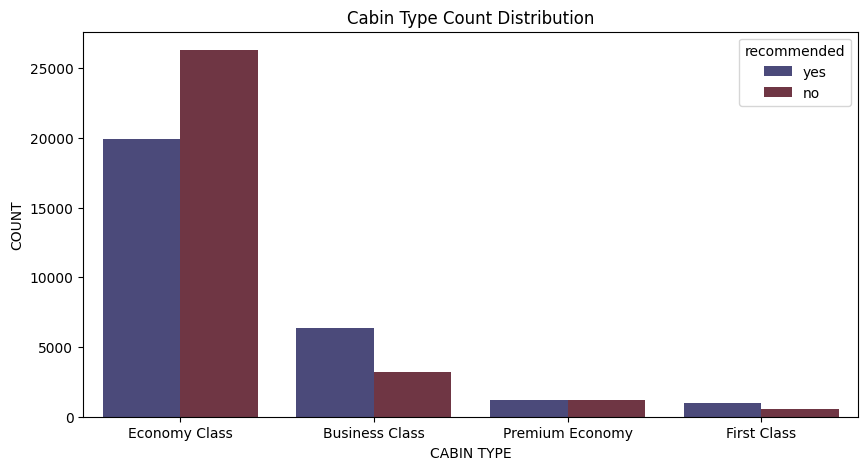

In [ ]:
# Chart - 9 visualization code
# Cabin Type Count Distribution
plt.figure(figsize=(10,5))
sns.countplot(x="cabin", hue="recommended", data=airline_df, palette="icefire")
plt.xlabel("CABIN TYPE")
plt.ylabel("COUNT")
plt.xticks(rotation=0)
plt.title("Cabin Type Count Distribution")

##### 1. Why did you pick the specific chart?

This visualization effectively displays the count distribution of recommended and not recommended instances for each cabin type, providing insights into passenger recommendations based on the cabin they chose. The use of different colors helps distinguish between recommended and not recommended categories.

##### 2. What is/are the insight(s) found from the chart?

Despite having the highest count of instances, the majority of passengers in Economy Class are not recommending the airline. This suggests that while Economy Class is popular in terms of the number of passengers, there may be aspects of the experience that result in lower satisfaction and fewer positive recommendations.

Premium Economy ,Business Class and First Class, with lower counts compared to Economy Class, show a higher proportion of recommended instances. This indicates that passengers in these classes are more likely to provide positive recommendations, possibly due to a higher level of satisfaction with the premium services and amenities offered.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gleaned from the Cabin Type Count Distribution Chart present valuable opportunities for the airline to create a positive business impact. By recognizing that despite its popularity, Economy Class has lower recommendation rates, the airline can strategically address specific concerns in this class to improve passenger satisfaction. Emphasizing the positive sentiments in Business and First Class through targeted marketing can attract more premium passengers and contribute to increased revenue. Additionally, addressing the mixed recommendations in Premium Economy presents an avenue for enhancing the overall experience in this class. These strategic adjustments have the potential to positively influence brand reputation, foster customer loyalty, and establish a competitive advantage in the market, ultimately contributing to sustained business growth.

#### Chart - 10 Relationship between a specific type of rating and the overall ratings

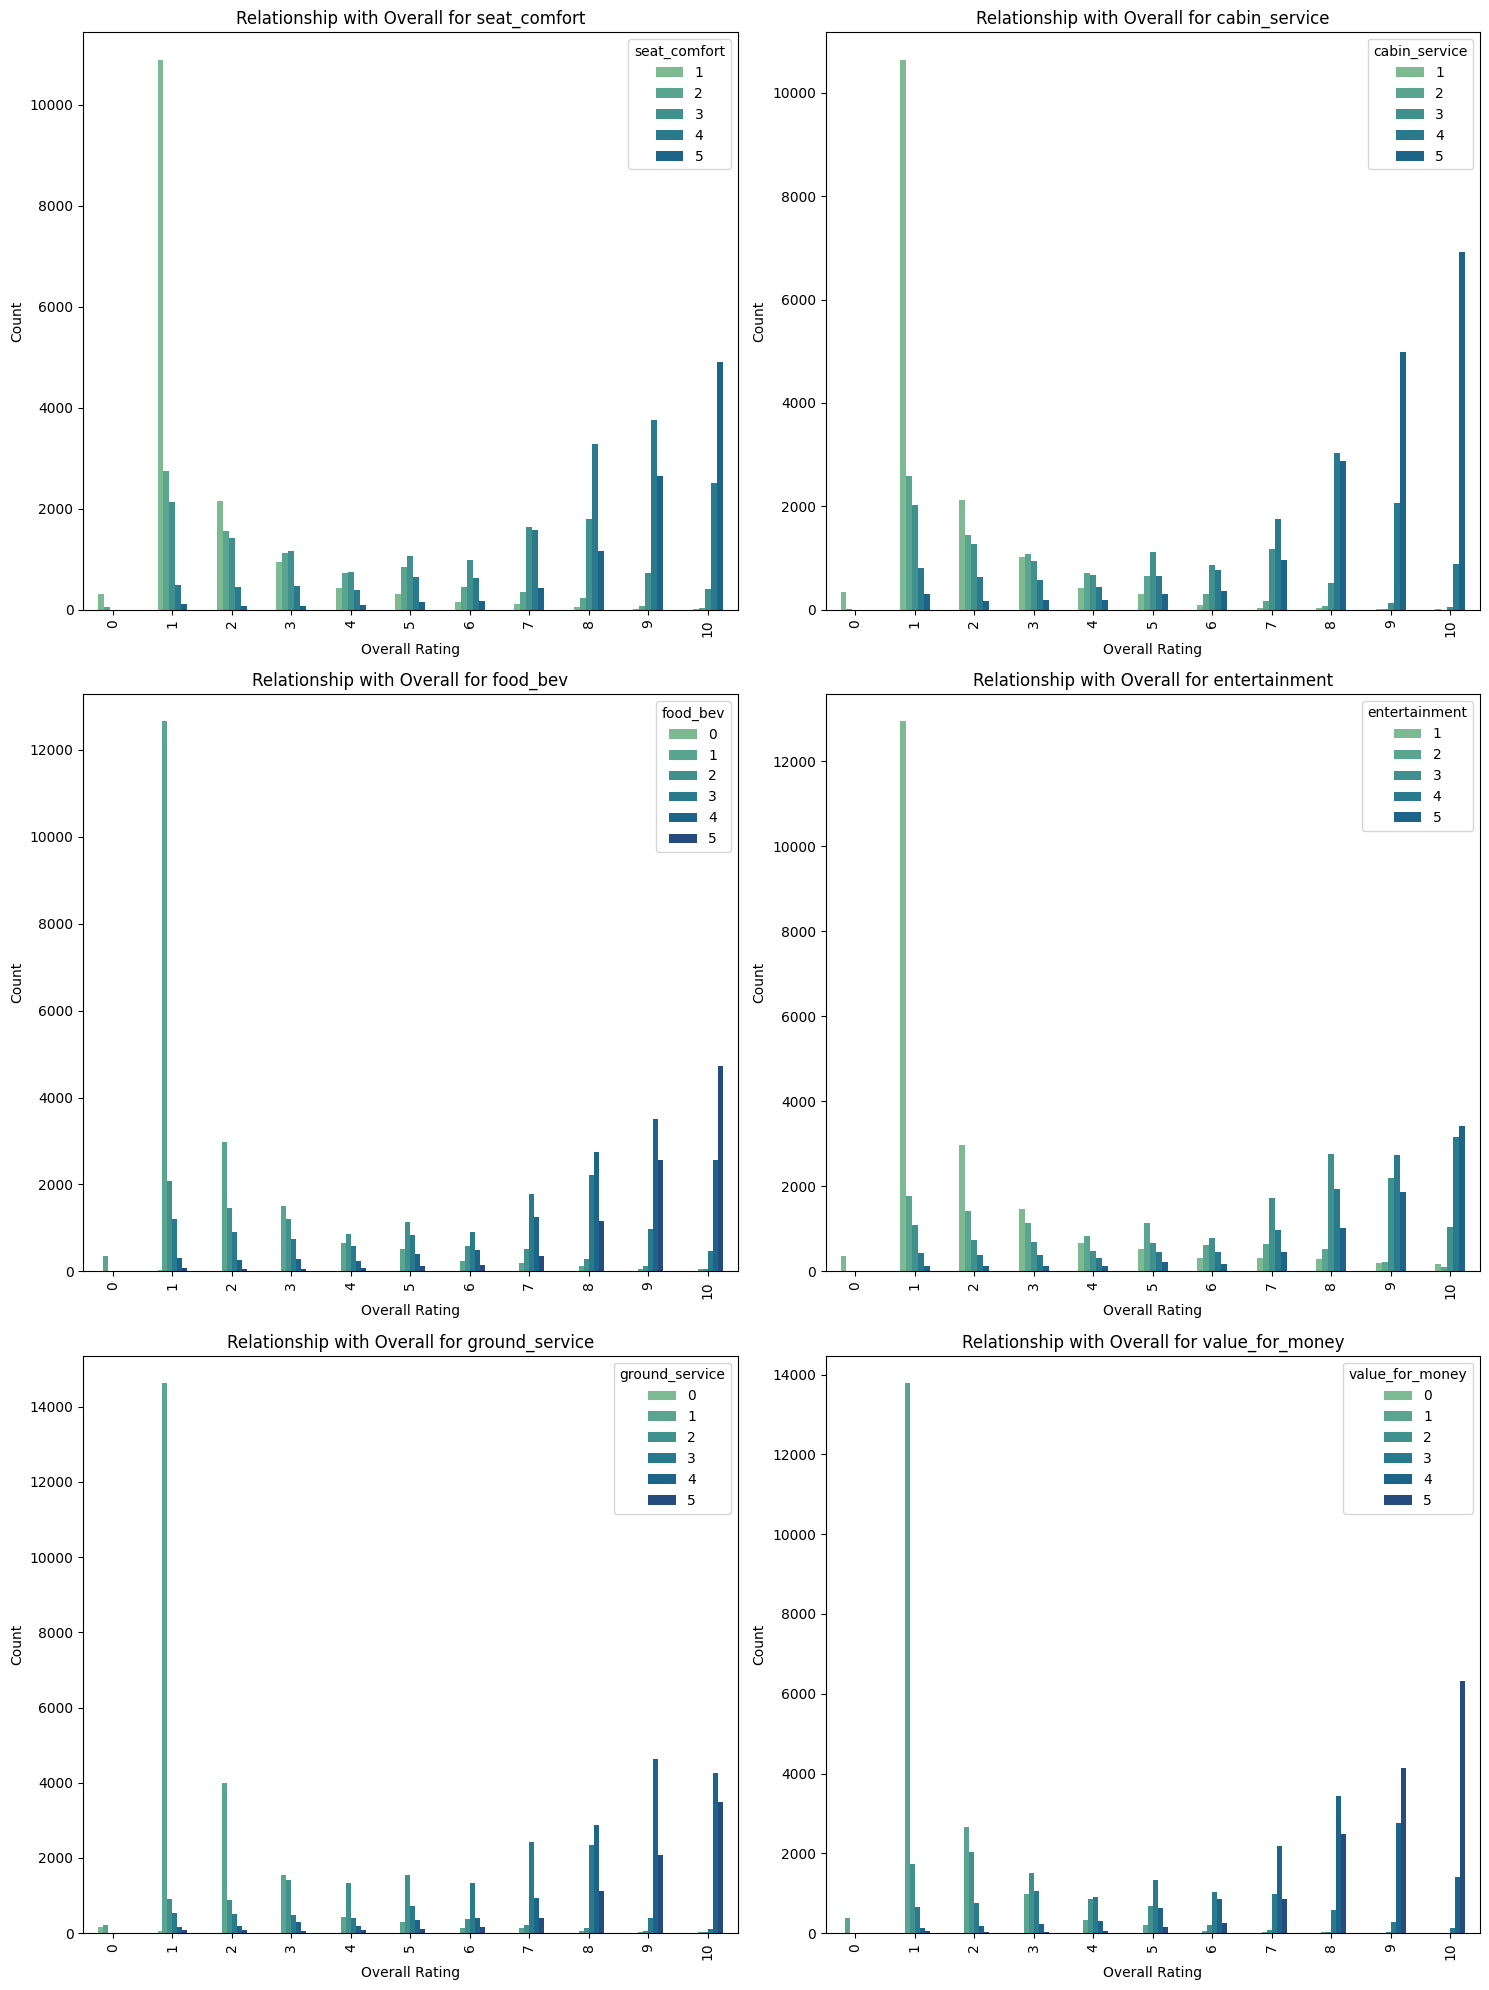

In [138]:
# Chart - 10 visualization code
# Grouping the various ratings columns to one list
review_columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()

# Set the color palette
sns.set_palette('crest')

# Loop through each column and plot the relationship with overall ratings
for i, column in enumerate(review_columns[1:]):
    x = airline_df.groupby([airline_df['overall']])
    x[column].value_counts().unstack().plot(kind='bar', ax=axes[i], legend=True)
    axes[i].set_title(f'Relationship with Overall for {column}', fontsize=12)
    axes[i].set_xlabel('Overall Rating')
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?


The code utilizes a set of bar charts arranged in a 2x3 grid, where each subplot represents the relationship between a specific type of rating (e.g., seat comfort, cabin service, etc.) and the overall ratings.

##### 2. What is/are the insight(s) found from the chart?

As observed in the visual representation above, the overall ratings column is evidently influenced by the individual ratings in other columns. This implies a positive correlation, indicating that higher ratings in specific aspects, such as seat comfort, cabin service, food and beverage, entertainment, ground service, and value for money, contribute to an increase in the overall ratings. The visual alignment of the bar charts in the grid highlights a consistent pattern where positive evaluations in each category tend to result in elevated overall ratings, underscoring the interconnected nature of the passenger reviews across diverse facets of the airline experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights guide the airline in strategically focusing on areas that contribute the most to overall customer satisfaction. Targeted enhancements in seat comfort, cabin service, food and beverage, entertainment, ground service, and value for money can lead to an overall improvement in the passenger experience.

Implementing improvements based on identified drivers can lead to enhanced overall customer satisfaction. Satisfied customers are more likely to become repeat customers, contribute positive reviews, and potentially recommend the airline to others, fostering loyalty and positive word-of-mouth.

#### Chart - 11 User Reviews/ Sentiment Analysis

In [142]:
#creating function to get sentiment score for review
def sentiment_scores(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    #scorring each reviews depending on their polarity
    sentiment_dict = sid_obj.polarity_scores(sentence)

    return  sentiment_dict['compound']


# creating numeric review column to store polarity for each customer review
airline_df['numeric_review']= airline_df['customer_review'].apply(sentiment_scores)

<Axes: xlabel='Overall Review Sentiment', ylabel='count'>

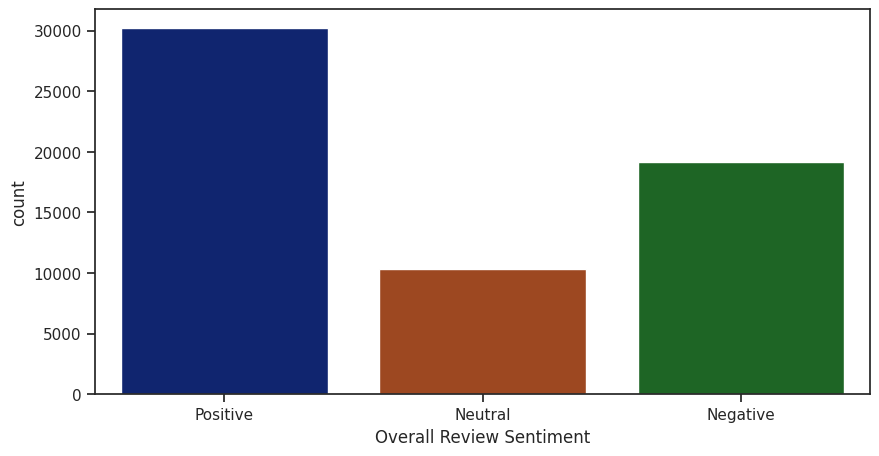

In [143]:
airline_df["Overall Review Sentiment"] = np.where(airline_df["numeric_review"] >= 0.5,"Positive",
                                                       np.where(airline_df["numeric_review"] <= -0.5,"Negative","Neutral"))


plt.figure(figsize=(10,5))
sns.countplot(x = 'Overall Review Sentiment', data = airline_df, palette="dark")

##### 1. Why did you pick the specific chart?

Display a bar chart showing the distribution of sentiments (positive, negative, neutral) across all user reviews. This provides a quick overview of the overall sentiment distribution

##### 2. What is/are the insight(s) found from the chart?

The sentiment distribution suggests that the majority of customers express positive sentiments about the airline, with a substantial number of positive reviews outnumbering the negative and neutral ones. This positive sentiment can be indicative of satisfied customers who had positive experiences with the airline's services. Understanding these sentiment patterns can guide the airline in reinforcing positive aspects, addressing areas of concern, and overall improving the customer experience to maintain and build upon this positive sentiment. If you have any specific questions or if there's more information you'd like to analyze, feel free to let me know!

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identify the specific aspects or services that receive consistently positive feedback. Reinforce and highlight these strengths in marketing campaigns to attract new customers who value these aspects.

Understand the factors contributing to positive sentiment and use this information to enhance overall customer experience. Address any specific areas of improvement mentioned in positive reviews to ensure continued satisfaction.

#### Chart - 12 Visualize the distribution of ratings

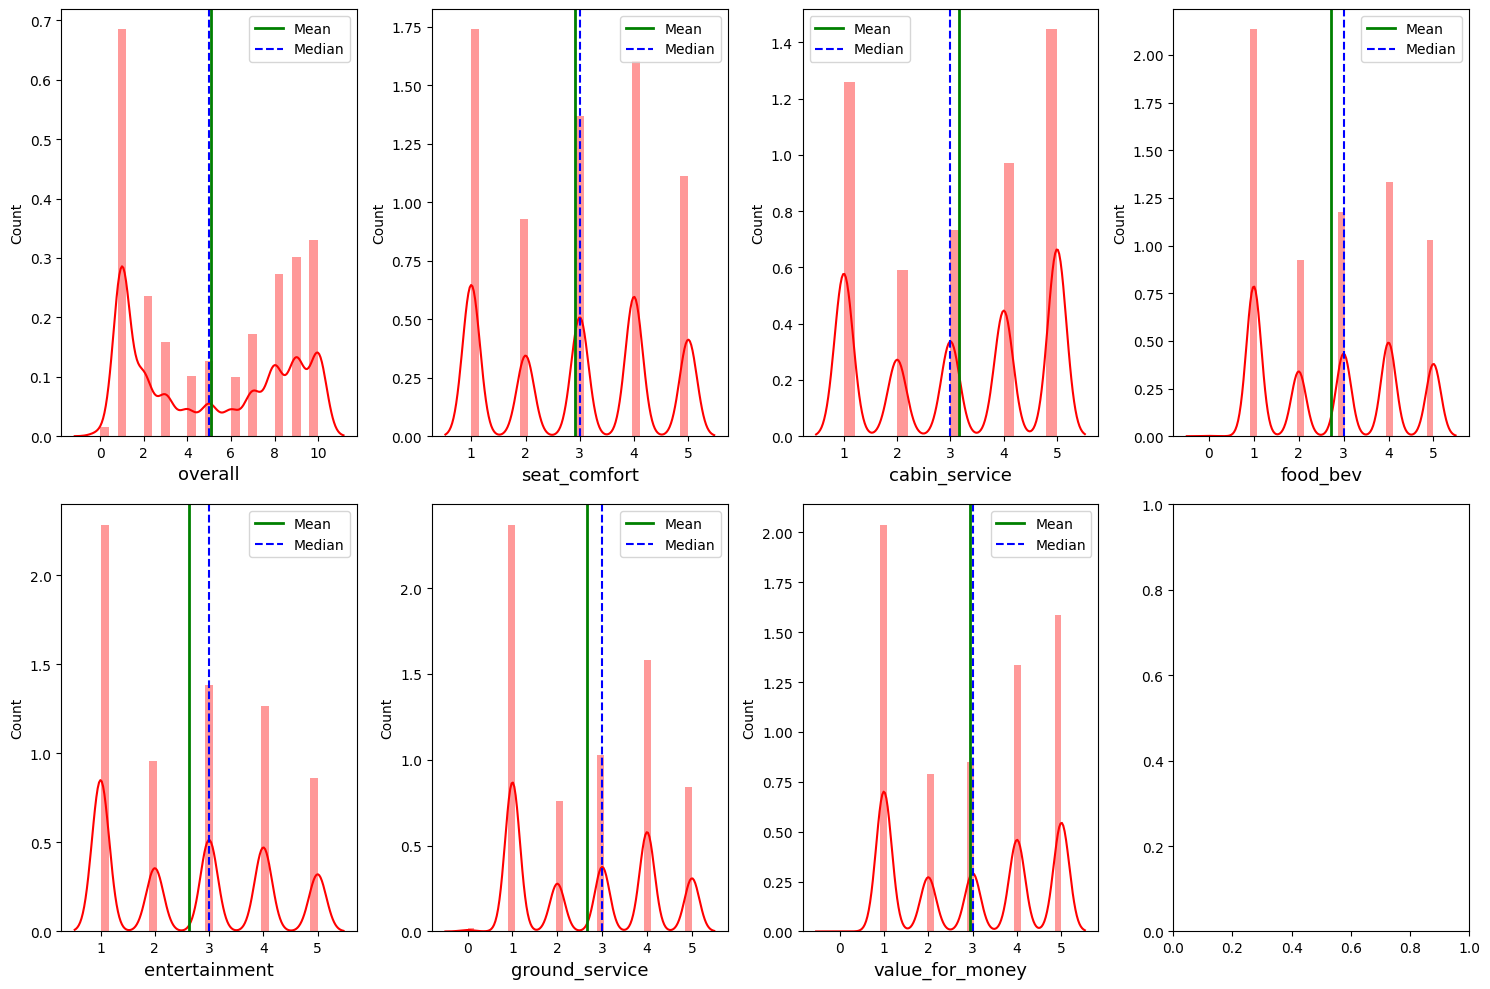

In [139]:
# Chart - 12 visualization code
# Define the columns for which you want to visualize the distribution
columns_to_visualize = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each column and plot the distribution
for i, col in enumerate(columns_to_visualize):
    sns.distplot(airline_df[col], color='r', ax=axes[i])
    axes[i].set_xlabel(col, fontsize=13)
    axes[i].set_ylabel('Count')

    # Plotting the mean and the median.
    axes[i].axvline(airline_df[col].mean(), color='green', linewidth=2, label='Mean')
    axes[i].axvline(airline_df[col].median(), color='blue', linestyle='dashed', linewidth=1.5, label='Median')

    # Add legend to each subplot
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

The chosen chart type aims to provide a clear and concise visualization of the distribution of each variable while highlighting central tendencies through mean and median indicators. The grid layout facilitates efficient comparison across multiple variables.

##### 2. What is/are the insight(s) found from the chart?

*  Most of the passenger give overall rating around 5

*  Most of the people give seat comfort service rating around 3

*  Most of the people give cabin_service rating around 3.2

*  Most of the people give food_bev service rating around 3

*  Most of the people give entertainment service rating around 2

*  Most of the people give ground service rating around 3

*  Most of the people give value_for_money rating around 3

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying Strengths: Recognizing the areas where the airline receives higher ratings (e.g., overall rating around 4.5) helps identify strengths that can be emphasized in marketing materials to attract more customers.

Improving Services: Understanding specific service areas with lower ratings (e.g., seat comfort and entertainment) allows the airline to focus on improvements, potentially leading to higher customer satisfaction and loyalty.

Enhancing Value for Money: Addressing feedback related to value-for-money ratings around 3 can help the airline optimize pricing strategies or enhance perceived value, positively impacting customer satisfaction.

#### Chart - 13 - Correlation Heatmap

<Axes: >

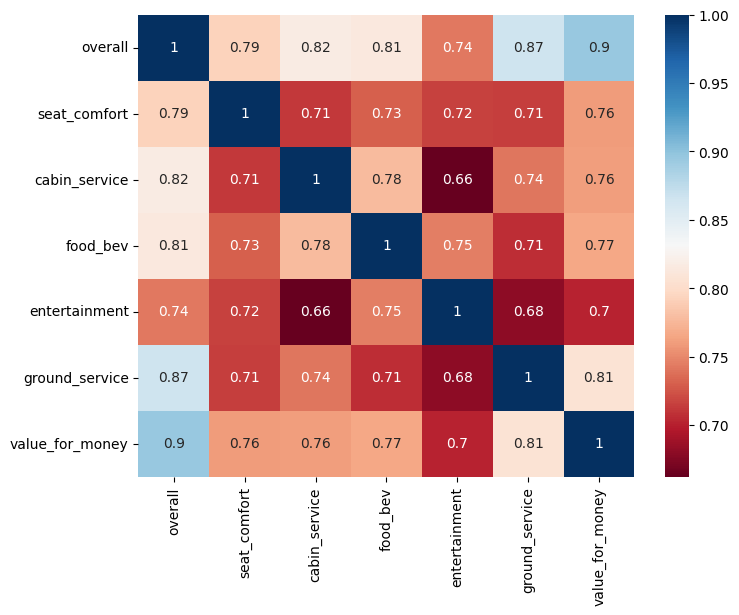

In [140]:
# Correlation Heatmap visualization code
#Heatmap with correlation details
plt.figure(figsize=(8,6))
sns.heatmap(airline_df.corr(), annot=True, cmap='RdBu')

##### 1. Why did you pick the specific chart?

The correlation heatmap is a versatile and informative visualization tool suitable for exploring complex relationships in multivariate datasets, making it well-suited for the analysis of interdependencies between various service-related variables in passenger reviews.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap reveals a notably strong positive relationship among key columns, including 'overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', and 'value_for_money'. The correlations range from a minimum of 0.61 to a maximum of 0.9, with the majority clustering around 0.75. These findings suggest a significant degree of interdependence between various aspects of passenger reviews, indicating that higher ratings in one category often correspond to higher ratings in others. The cohesive pattern of positive correlations underscores the interconnected nature of passengers' perceptions across different service dimensions.

#### Chart - 14 - Pair Plot

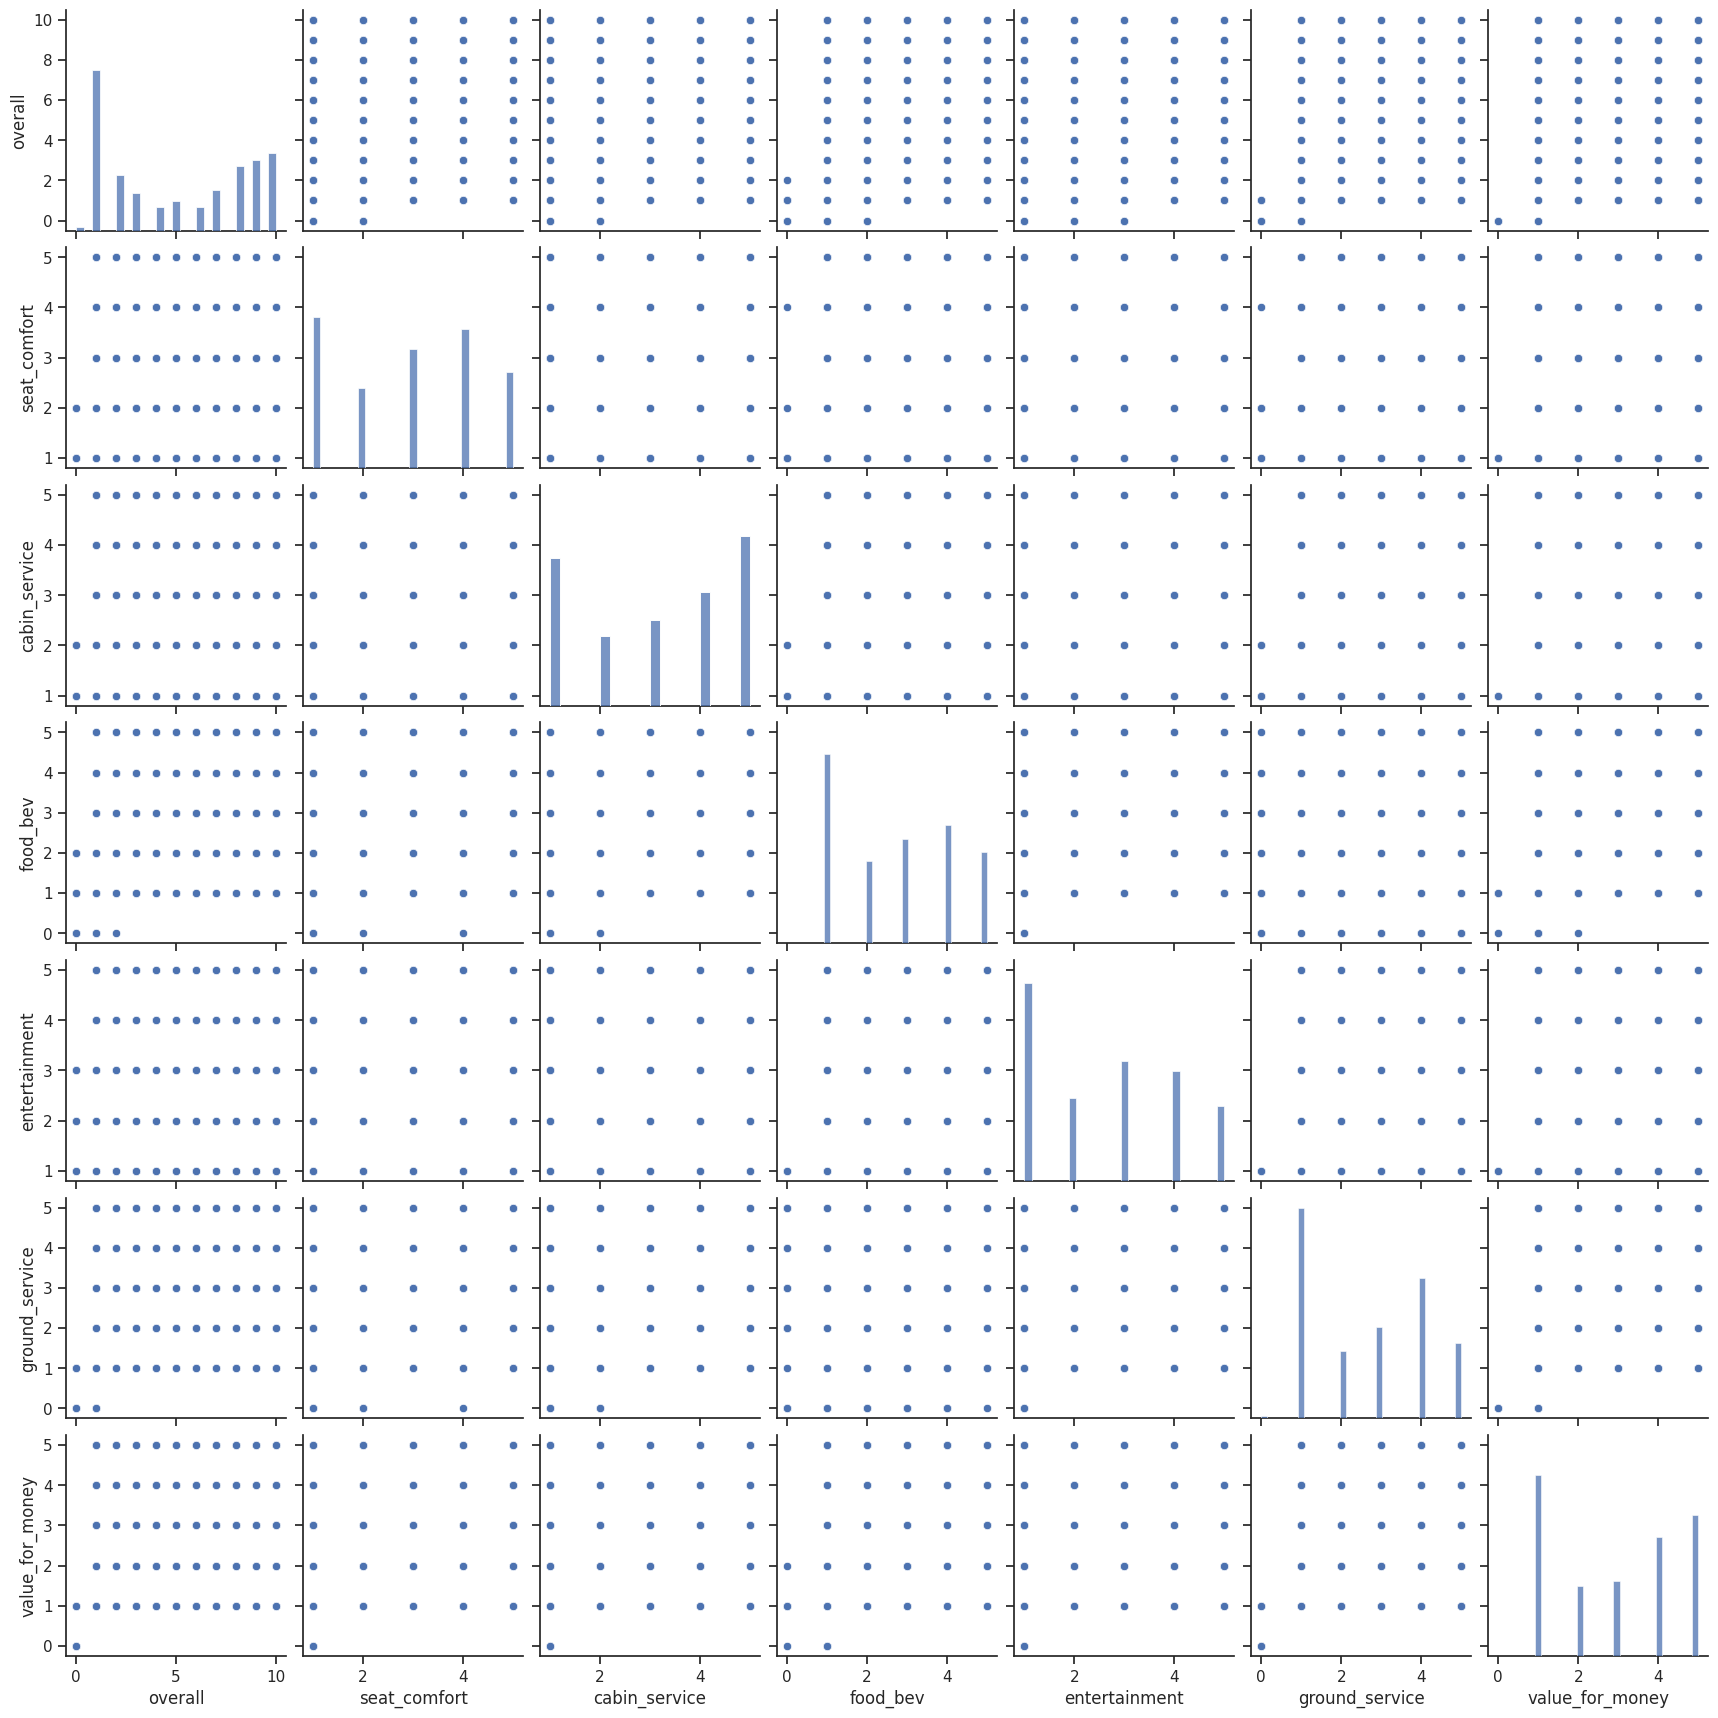

In [141]:
# Pair Plot visualization code
# Create a pair plot
sns.set(style="ticks")
sns.pairplot(airline_df)

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot is effective for visualizing relationships between several variables simultaneously. Each combination of variables is represented in a matrix of scatterplots.The pair plot offers a comprehensive view of the dataset's multivariate structure, providing analysts and stakeholders with a holistic understanding of variable interactions.



##### 2. What is/are the insight(s) found from the chart?

The variables are relatively independent of each other, meaning that changes in one variable do not consistently predict changes in another.Relationships might be more complex and involve multiple variables or interactions that are not apparent in individual scatter plots.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 (Null Hypothesis): There is no significant association between the 'traveller_type' and 'recommended' variables.

H1 (Alternative Hypothesis): There is a significant association between the 'traveller_type' and 'recommended' variables.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Example for Hypothesis Test 1
contingency_table = pd.crosstab(airline_df['traveller_type'], airline_df['recommended'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Reject the null hypothesis -  There is a significant association between the 'traveller_type' and 'recommended' variables.")
else:
    print("Fail to reject the null hypothesis - There is no significant association between the 'traveller_type' and 'recommended' variables")

Reject the null hypothesis -  There is a significant association between the 'traveller_type' and 'recommended' variables.


##### Which statistical test have you done to obtain P-Value?

For this hypothesis, I used chi-square test of independence which is a statistical test to determine if there is a significant association between two categorical variables. In this case, the two variables are traveller_type and recommended.

##### Why did you choose the specific statistical test?

This test is appropriate because the variables are categorical and I want to determine if there is a relationship between them.This test explores whether the type of traveler (solo, couple, family, business) is independent of the likelihood of recommending the airline.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 (Null Hypothesis): There is no significant association between the 'cabin' and 'recommended' variables.

H1 (Alternative Hypothesis): There is a significant association between the 'cabin' and 'recommended' variables.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(airline_df['cabin'], airline_df['recommended'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Reject the null hypothesis -  There is a significant association between the 'cabin' and 'recommended' variables.")
else:
    print("Fail to reject the null hypothesis - There is no significant association between the 'cabin' and 'recommended' variables.")

Reject the null hypothesis -  There is a significant association between the 'cabin' and 'recommended' variables.


##### Which statistical test have you done to obtain P-Value?

For the hypothesis test examining the association between 'cabin' and 'recommended,' a chi-square test of independence was conducted.This test aimed to ascertain whether there is a statistically significant association between the chosen cabin type ('cabin') and the likelihood of recommending the airline ('recommended').   

##### Why did you choose the specific statistical test?

This test examines whether the cabin type (economy, premium economy, business, first class) is independent of the likelihood of recommending the airline.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 (Null Hypothesis): There is no significant association between the 'traveller_type' and 'cabin' variables.

H1 (Alternative Hypothesis): There is a significant association between the 'traveller_type' and 'cabin' variables.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(airline_df['traveller_type'], airline_df['cabin'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Reject the null hypothesis -  There is a significant association between the 'traveller_type' and 'cabin' variables.")
else:
    print("Fail to reject the null hypothesis - There is no significant association between the 'traveller_type' and 'cabin' variables.")

Reject the null hypothesis -  There is a significant association between the 'traveller_type' and 'cabin' variables.


##### Which statistical test have you done to obtain P-Value?

For the hypothesis test investigating the association between 'traveller_type' and 'cabin,' a chi-square test of independence was executed. This test aimed to determine whether there is a statistically significant association between the type of traveler ('traveller_type') and the chosen cabin type ('cabin'). This outcome sheds light on whether there is a meaningful association between the traveler type and the preference for a specific cabin class.

##### Why did you choose the specific statistical test?

This test investigates whether the type of traveler is independent of the chosen cabin class.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#Creating a copy beforeHandling Missing Values
airline_df =airline_df_copy.copy()
airline_df.shape

(131895, 17)

####1.1 Droping the duplicates values

In [ ]:
# finding the duplicate values
airline_df.duplicated().sum()

70711

In [ ]:
# droping the duplicate values
airline_df.drop_duplicates(inplace = True)

In [ ]:
# Again checking duplicates
airline_df.duplicated().sum()

0

####1.2 Handling Missing Values

In [ ]:
# function for finding Missing values :
def missing_values_check(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
    missing_values_df = missing_values_df.sort_values('percent_missing', ascending=False).reset_index(drop=True)
    return missing_values_df

In [ ]:
# Percentage of missing values :
result = missing_values_check(airline_df)
result.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
column_name,aircraft,ground_service,date_flown,route,traveller_type,entertainment,food_bev,seat_comfort,cabin_service,cabin,value_for_money,overall,recommended,customer_review,review_date,author,airline
percent_missing,69.78295,39.250458,38.817338,38.688219,38.64409,34.247516,20.990782,8.127942,8.080544,4.051713,3.035107,2.914161,2.325771,0.001634,0.001634,0.001634,0.001634


##### Droping null values

In light of the findings from the previous analysis, it is evident that our dataset is characterized by a substantial number of null values. To gain a more focused understanding, the null value count will be examined with respect to the target variable 'recommended' first.

In [ ]:
# Let's create a dataset where columns contain null values in respect to 'recommended' column
recommended_nullvalues = airline_df[airline_df['recommended'].isnull()]

In [ ]:
# count of null values in the new dataset
airline_df['recommended'].isnull().sum()

1423

In [ ]:
# Let's drop the Null values of all columns with respect to 'recommended' column
airline_df.drop(airline_df[airline_df['recommended'].isnull()].index , inplace = True)

In [ ]:
# Function to check the null value percentage
result = missing_values_check(airline_df)
result.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
column_name,aircraft,ground_service,date_flown,route,traveller_type,entertainment,food_bev,seat_comfort,cabin_service,overall,cabin,value_for_money,airline,customer_review,review_date,author,recommended
percent_missing,69.065109,37.803919,37.360486,37.229966,37.184786,32.681849,19.109453,5.940329,5.891802,2.951758,1.768712,0.726226,0.0,0.0,0.0,0.0,0.0


##### Droping columns with higher missing data

aircraft -  aircraft feature has highest null values more than 60%

Route - Not needed for building a model as it is independent of the Services and Quality of travel.

Date_flown - Not needed for building a model as it is not a time series data, also some common time period is there between 2 dates.


In [ ]:
#drop unnecessary columns,which are not for our use
airline_df.drop(['aircraft', 'route', 'date_flown'], axis=1, inplace=True)

In [ ]:
result = missing_values_check(airline_df)
result.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
column_name,ground_service,traveller_type,entertainment,food_bev,seat_comfort,cabin_service,overall,cabin,value_for_money,airline,author,review_date,customer_review,recommended
percent_missing,37.803919,37.184786,32.681849,19.109453,5.940329,5.891802,2.951758,1.768712,0.726226,0.0,0.0,0.0,0.0,0.0


#####Imputation for categorial Columns:



Since traveller_type and cabin are categorial value and there is no possible way to identify what this null value could be, therefore trying to replace null values using mode since mode is best way to replace categorial value.

In [ ]:
#replacing null value in traveller_type and cabin using mode
for col in ['traveller_type', 'cabin']:
    airline_df[col].fillna(airline_df[col].mode()[0], inplace=True)

In [ ]:
result = missing_values_check(airline_df)
result.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
column_name,ground_service,entertainment,food_bev,seat_comfort,cabin_service,overall,value_for_money,airline,author,review_date,customer_review,traveller_type,cabin,recommended
percent_missing,37.803919,32.681849,19.109453,5.940329,5.891802,2.951758,0.726226,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#####**Imputation for Numerical Columns:**

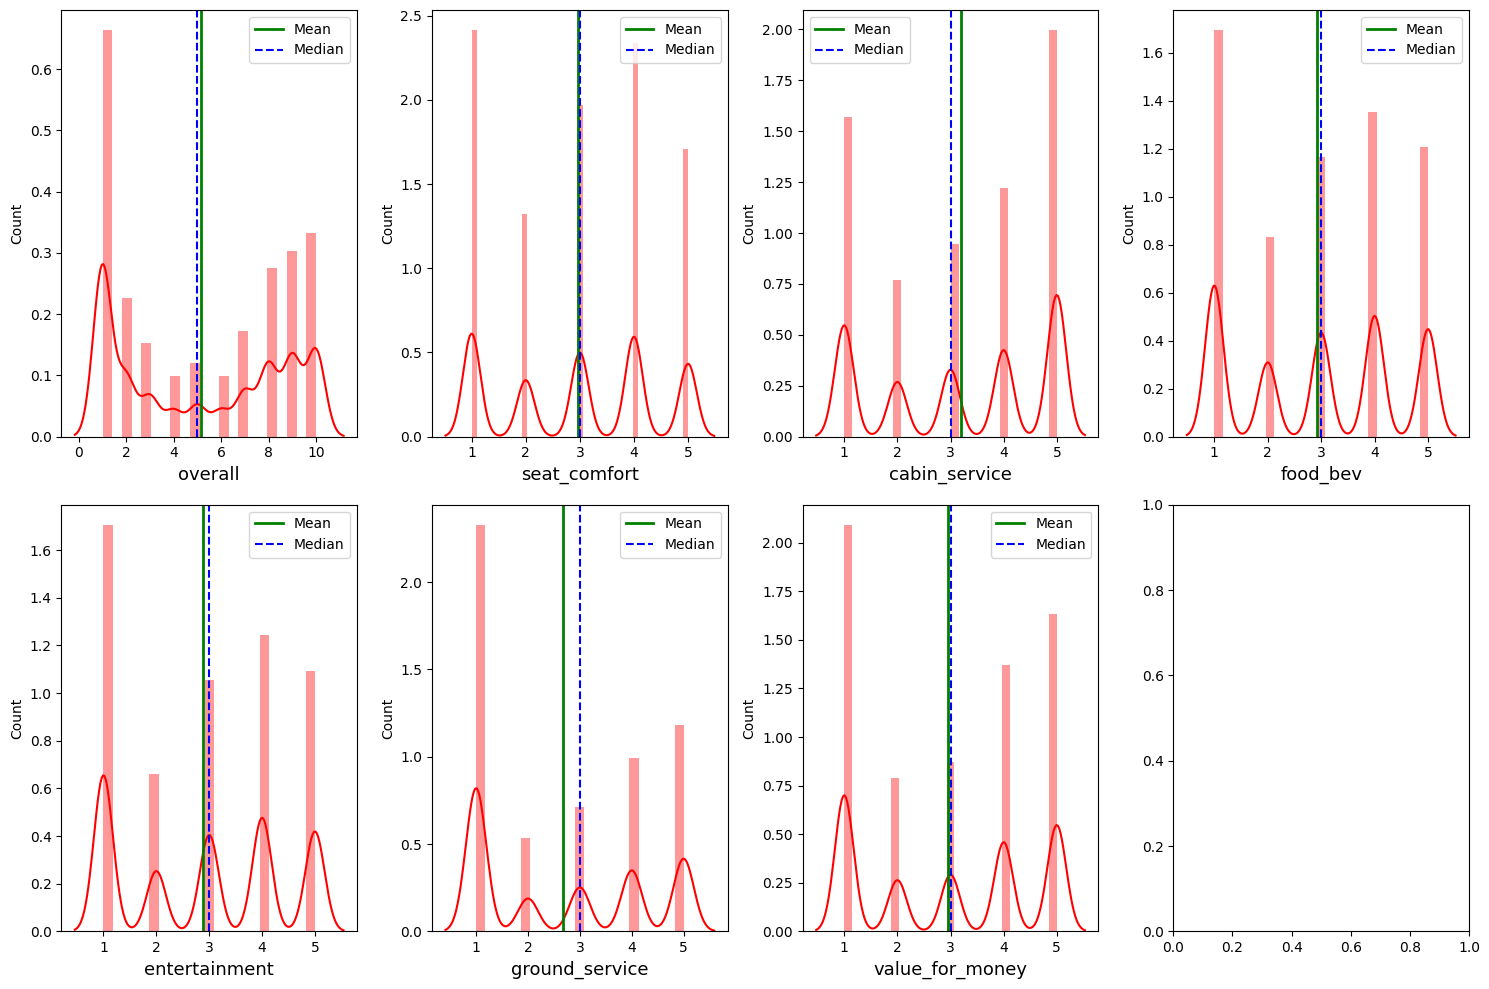

In [ ]:
#checking distribution of other null value to find correct way to impute
columns_to_visualize = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each column and plot the distribution
for i, col in enumerate(columns_to_visualize):
    sns.distplot(airline_df[col], color='r', ax=axes[i])
    axes[i].set_xlabel(col, fontsize=13)
    axes[i].set_ylabel('Count')

    # Plotting the mean and the median.
    axes[i].axvline(airline_df[col].mean(), color='green', linewidth=2, label='Mean')
    axes[i].axvline(airline_df[col].median(), color='blue', linestyle='dashed', linewidth=1.5, label='Median')

    # Add legend to each subplot
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
! pip install fancyimpute

In [ ]:
from fancyimpute import IterativeImputer

# Assuming 'airline_df' is your DataFrame with numerical multimodal data
numerical_multimodal_columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']
# Create an IterativeImputer instance
imputer = IterativeImputer()

# Perform imputation on the selected columns
airline_df[numerical_multimodal_columns] = imputer.fit_transform(airline_df[numerical_multimodal_columns])


In [ ]:
result = missing_values_check(airline_df)
result.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
column_name,airline,overall,author,review_date,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
percent_missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


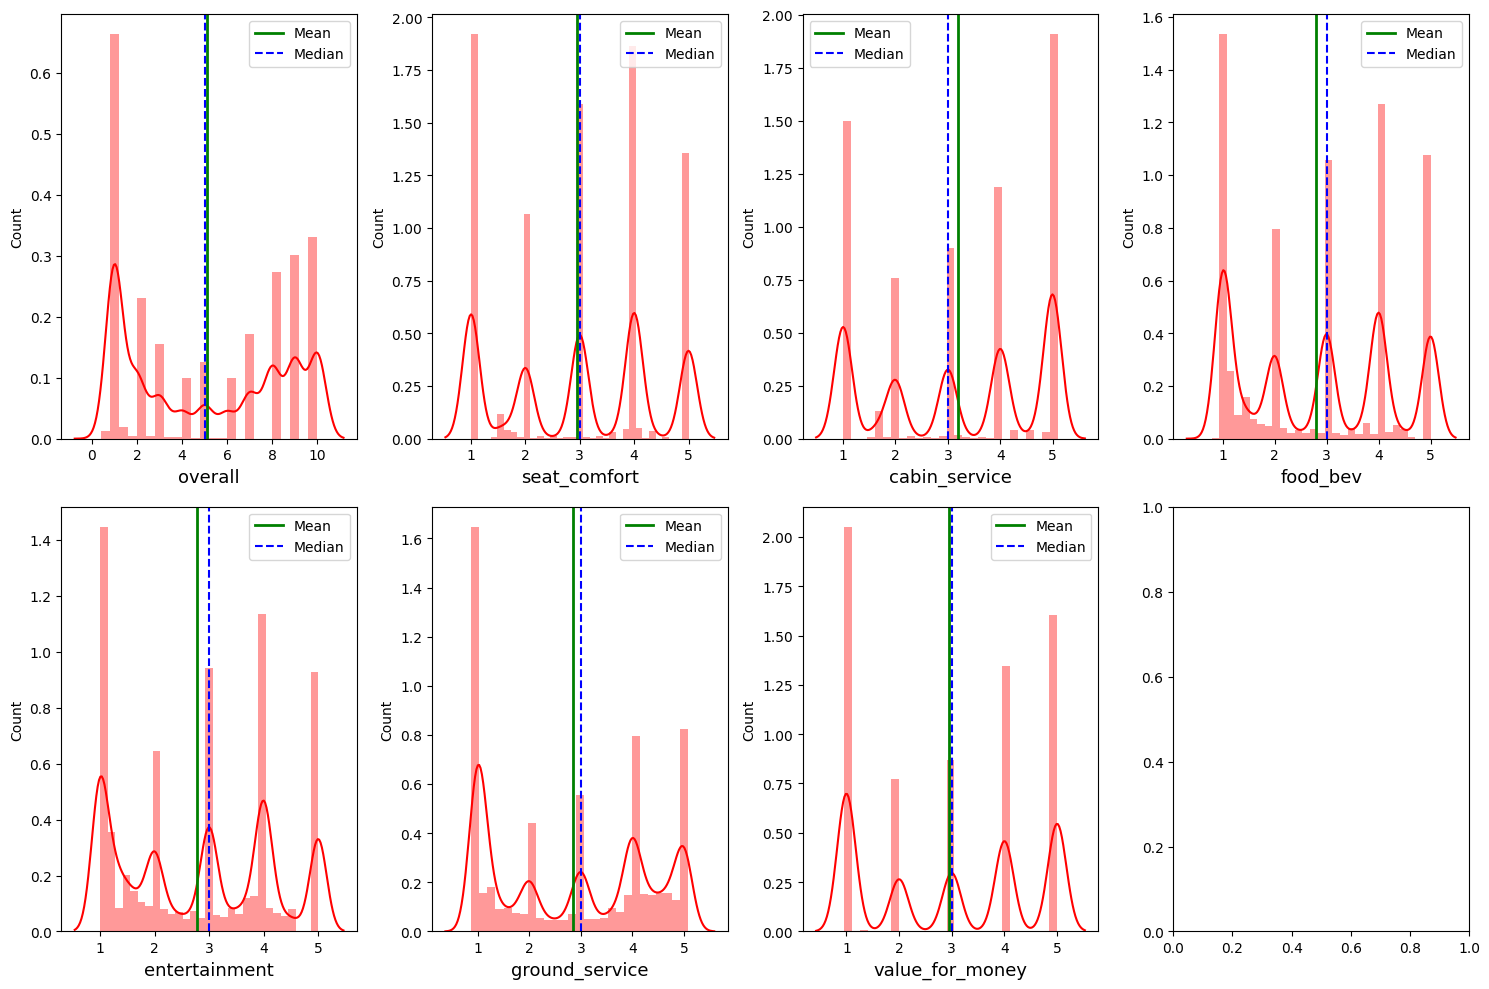

In [ ]:
#checking distribution of imputed columns is same or not
columns_to_visualize = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each column and plot the distribution
for i, col in enumerate(columns_to_visualize):
    sns.distplot(airline_df[col], color='r', ax=axes[i])
    axes[i].set_xlabel(col, fontsize=13)
    axes[i].set_ylabel('Count')

    # Plotting the mean and the median.
    axes[i].axvline(airline_df[col].mean(), color='green', linewidth=2, label='Mean')
    axes[i].axvline(airline_df[col].median(), color='blue', linestyle='dashed', linewidth=1.5, label='Median')

    # Add legend to each subplot
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

The imputation method employed does not alter the distribution of the dataset, as observed.

#### What all missing value imputation techniques have you used and why did you use those techniques?

1.  **Dropping Duplicate Values:**
Duplicate rows have been removed from the dataset to ensure data cleanliness and avoid redundancy.

2.  **Handling Null Values in 'Recommended' Column:**
Rows with null values in the 'Recommended' column have been dropped, focusing on the target variable for prediction.

3.  **Dropping Columns with High Missing Data:**
Columns with more than 60% missing data and unrelated columns have been dropped to streamline the dataset and focus on relevant features.

4.  **Handling Categorical Null Values - Traveller Type and Cabin:**
For the 'Traveller_Type' and 'Cabin' columns, which are categorical, null values have been replaced using the mode (most frequent category). This is a reasonable approach when the nature of missingness is unknown, and mode imputation provides a simple way to handle categorical data.

5.  **Handling Numerical Multimodal Data - MICE Algorithm:**
For numerical multimodal data, the Multivariate Imputation by Chained Equations (MICE) algorithm has been used. This method helps impute missing values in a way that preserves the multimodal nature of the data and doesn't significantly alter the distribution.

### 2. Handling Outliers

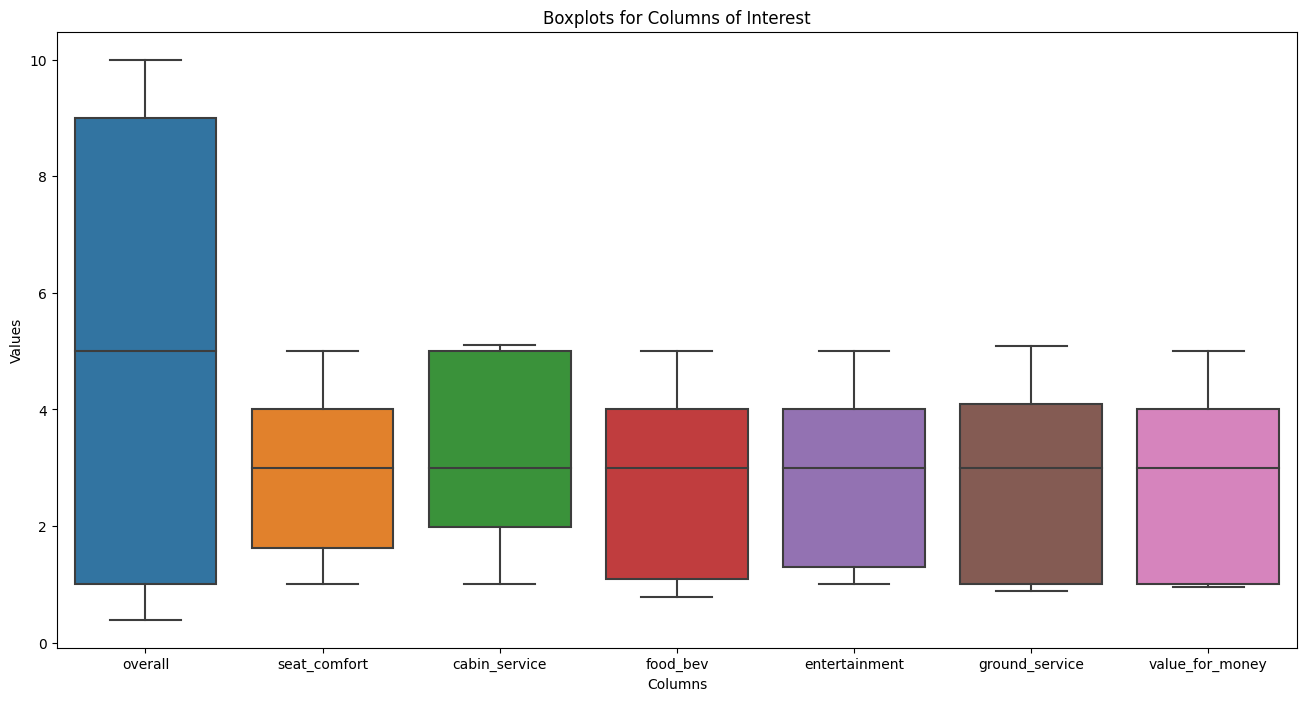

In [ ]:
# Select the columns of interest
columns_of_interest = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Create a boxplot for each column
plt.figure(figsize=(16, 8))
sns.boxplot(data=airline_df[columns_of_interest])
plt.title('Boxplots for Columns of Interest')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

The boxplot indicates that there are no outliers, it suggests that the majority of the data falls within a reasonable range. It's always a good practice to verify results using descriptive statistics and other visualization techniques

##### What all outlier treatment techniques have you used and why did you use those techniques?

The absence of outliers in the boxplot suggests that there is no need for any outlier treatment or removal, as the data within the specified columns falls within a reasonable and expected range.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# LabelEncoding
le = LabelEncoder()

# Apply label encoding to the 'traveller_type' column
airline_df['traveller_type_encoded'] = le.fit_transform(airline_df['traveller_type'])

# Apply label encoding to the 'cabin' column
airline_df['cabin_encoded'] = le.fit_transform(airline_df['cabin'])

# Apply label encoding to the 'recommended' column
airline_df['recommended'] = le.fit_transform(airline_df['recommended'])

# Drop the original categorical columns if needed
airline_df.drop(['traveller_type', 'cabin'], axis=1, inplace=True)

In [ ]:
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended',
       'traveller_type_encoded', 'cabin_encoded'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

**One-Hot Encoding for 'recommended' with drop_first=True**:

This technique is useful when dealing with binary categorical variables, such as 'recommended,' where there are only two possible categories. Setting drop_first=True drops one of the encoded columns to avoid multicollinearity in regression models.

**Label Encoding for 'traveller_type' and 'cabin' without specifying drop_first:**

Label Encoding is a preprocessing technique used to convert categorical data into numerical form. In Label Encoding, each unique category in a categorical variable is assigned an integer, starting from 0. The main idea is to represent categorical variables with integer values while preserving the ordinal relationships.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Textual data preprocessing is not required for this type of analysis.

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation


Feature manipulation involves cleaning and preparing the data has been done by addressing issues such as handling missing values, duplicates, Categorical Encoding and performing other preprocessing tasks.

#### 2. Feature Selection


In the process of preparing the dataset for machine learning modeling, we streamline the data by excluding unnecessary information that does not contribute to the predictive task. This involves dropping irrelevant variables and retaining only the essential features deemed crucial for the accuracy and efficiency of the machine learning model. The focus is on selecting and preserving pertinent information that directly influences the model's ability to make accurate predictions. This deliberate feature selection ensures a more focused and streamlined dataset for optimal model performance.

#####droping unnecessary columns:




Author - Being the categorical with high Variability not required for prediction.

Review_date - Not needed for building a model as it is not a time series data, also some common time period is there between 2 dates.

Customer_review - As it is related to overall review feature of the datasets.

airline - As it contains lots of catagorical values.

In [ ]:
#drop unnecessary columns,which are not for our use
airline_df.drop([ 'author', 'review_date', 'customer_review', 'airline'], axis=1, inplace=True)

In [ ]:
airline_df.head()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,traveller_type_encoded,cabin_encoded
1,7.0,4.0,5.0,4.0,4.0,2.0,4.0,1,0,1
3,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0,2,1
5,3.0,1.0,4.0,1.0,3.0,1.0,2.0,0,0,1
7,10.0,4.0,5.0,5.0,5.0,5.0,5.0,1,3,1
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,3,1


##### What all feature selection methods have you used  and why?


Extraneous columns that are independent and do not contribute to the predictive capabilities of the machine learning model were systematically removed during the data preprocessing phase. This strategic column elimination is aimed at refining the dataset, focusing only on those attributes essential for robust model training and predictive accuracy

##### Which all features you found important and why?

In the context of our machine learning modeling for the airline dataset, we have identified key features that exhibit high correlation and provide direct insights into the recommendation outcome. The columns, including 'airline,' 'overall,' 'traveller_type,' 'cabin,' 'seat_comfort,' 'cabin_service,' 'food_bev,' 'entertainment,' 'ground_service,' and 'value_for_money,' collectively encapsulate significant information relevant to the recommendation prediction. Among these, 'recommended' is designated as the target variable for our machine learning analysis. This focused selection ensures that the model leverages the most pertinent and interrelated data points for accurate recommendation predictions.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

#####boxcpox

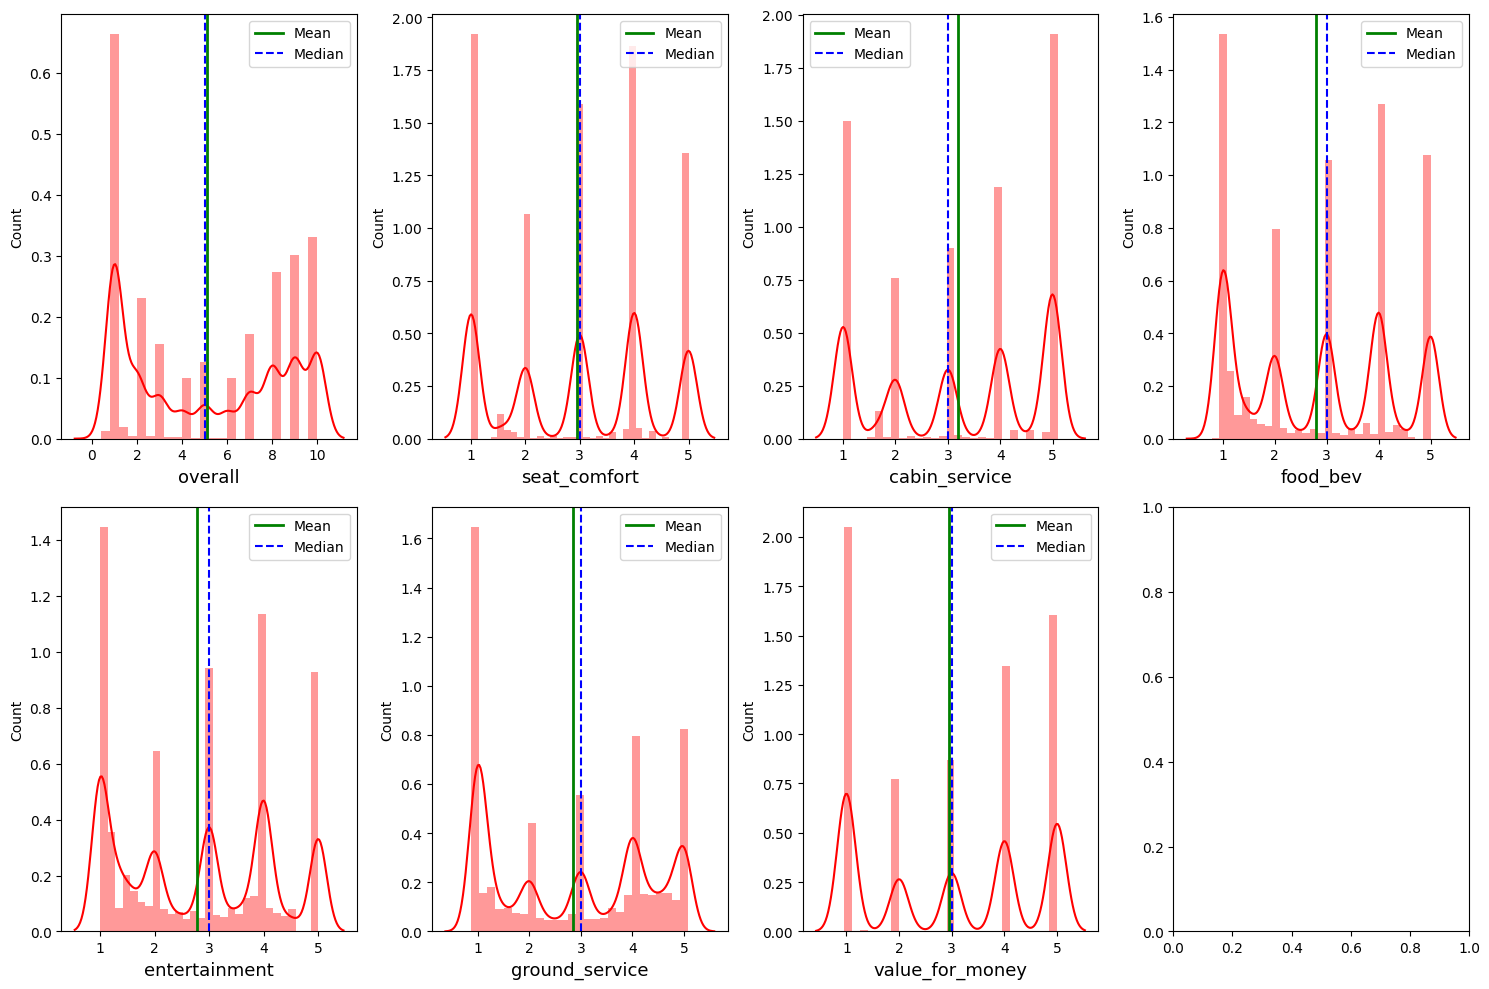

In [ ]:
#checking distribution
columns_to_visualize = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each column and plot the distribution
for i, col in enumerate(columns_to_visualize):
    sns.distplot(airline_df[col], color='r', ax=axes[i])
    axes[i].set_xlabel(col, fontsize=13)
    axes[i].set_ylabel('Count')

    # Plotting the mean and the median.
    axes[i].axvline(airline_df[col].mean(), color='green', linewidth=2, label='Mean')
    axes[i].axvline(airline_df[col].median(), color='blue', linestyle='dashed', linewidth=1.5, label='Median')

    # Add legend to each subplot
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

As we can see data is Multimodal, Multimodality in data refers to the presence of multiple modes or peaks in the distribution of a variable. While dealing with multimodal distributions and want to reduce multimodality, you may consider transformations that aim to make the distribution more unimodal or symmetric.

We are using Box-Cox transformation .The Box-Cox transformation is a family of power transformations that includes logarithmic transformations as a special case. It is effective for stabilizing variance and handling skewed or multimodal distributions.

In [ ]:
# Transform Your data
from scipy.stats import boxcox

columns_to_Transform = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

for col in columns_to_Transform:
  airline_df[col], _ = boxcox(airline_df[col])


### 6. Data Scaling

#####Scaling(MinMaxScale)

In [ ]:
# Display summary statistics
airline_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,traveller_type_encoded,cabin_encoded
count,59761.000000,59761.000000,59761.000000,59761.000000,59761.000000,59761.000000,59761.000000,59761.000000,59761.000000,59761.000000
mean,1.878598,1.550352,1.902695,1.170732,1.182706,1.185506,1.326050,0.476783,2.216345,0.945884
std,1.435908,1.081698,1.318604,0.863694,0.841190,0.910742,1.022172,0.499465,1.083170,0.587051
min,-0.784054,0.000000,0.000000,-0.221830,0.000000,-0.126008,-0.049160,0.000000,0.000000,0.000000
25%,0.000000,0.584497,0.920869,0.095533,0.275453,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.201334,1.671165,1.804194,1.413956,1.426981,1.419830,1.496269,0.000000,3.000000,1.000000
75%,3.394162,2.373398,3.407457,1.912234,1.934927,1.962499,2.056861,1.000000,3.000000,1.000000
max,3.636831,3.027072,3.484816,2.344756,2.377574,2.392848,2.555308,1.000000,3.000000,3.000000


In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

# Specifying columns to scale
columns_to_transform = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Applying Min-Max Scaling to the specified columns
airline_df[columns_to_transform] = scaler.fit_transform(airline_df[columns_to_transform])

In [ ]:
# Display summary statistics
print(airline_df.describe())

            overall  seat_comfort  cabin_service      food_bev  entertainment  \
count  59761.000000  59761.000000   59761.000000  59761.000000   59761.000000   
mean       0.602289      0.512162       0.545996      0.542574       0.497442   
std        0.324801      0.357341       0.378385      0.336515       0.353802   
min        0.000000      0.000000       0.000000      0.000000       0.000000   
25%        0.177352      0.193090       0.264252      0.123652       0.115855   
50%        0.675292      0.552073       0.517730      0.637339       0.600184   
75%        0.945108      0.784057       0.977801      0.831480       0.813824   
max        1.000000      1.000000       1.000000      1.000000       1.000000   

       ground_service  value_for_money   recommended  traveller_type_encoded  \
count    59761.000000     59761.000000  59761.000000            59761.000000   
mean         0.520678         0.528019      0.476783                2.216345   
std          0.361570         

##### Which method have you used to scale you data and why?

MinMaxScaler is used .Scales the data to a specified range (commonly [0, 1]). It's suitable for transforming data to a consistent scale and might be beneficial if the multimodal distribution spans a specific range.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

This dataset doesnot need any dimensionality reduction.

Dimensionality reduction becomes valuable in scenarios where the dataset exhibits a high number of features, potentially causing challenges such as overfitting and computational inefficiency. Techniques like principal component analysis (PCA) and singular value decomposition (SVD) are commonly employed for this purpose.

The motivation behind dimensionality reduction stems from several advantages. Firstly, it aids in mitigating the size of large datasets, proving especially beneficial when dealing with extensive data volumes. Additionally, by reducing the number of features, dimensionality reduction can enhance the performance of machine learning models. This improvement is characterized by quicker computation and better generalization to new data, thereby addressing challenges associated with high-dimensional datasets.

Further reduction can leads to loss of important information and negatively impacts model generalization, it might be counterproductive.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Create the independent variable data
X = airline_df.drop(['recommended'],axis=1)

# Create the dependent variable data (target)
y = airline_df['recommended']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#Checking the test and train sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(47808, 9)
(47808,)
(11953, 9)
(11953,)


##### What data splitting ratio have you used and why?

The 80/20 ratio, often referred to as the Pareto principle or the 80/20 rule, suggests that, in many situations, roughly 80% of the effects come from 20% of the causes. This principle is derived from observations in various fields and is named after the Italian economist Vilfredo Pareto, who noted that approximately 80% of Italy's land was owned by 20% of the population.

It's important to note that the 80/20 ratio is not a strict rule but rather a generalization based on empirical observations. Ratios other than 80/20 may be applicable in different contexts. However, the principle serves as a heuristic that encourages a focus on the most impactful elements, helping to prioritize efforts and resources for maximum efficiency

### 9. Handling Imbalanced Dataset

The Percentage of No labels of Target Variable is 52.0
The Percentage of Yes labels of Target Variable is 48.0


<Axes: xlabel='recommended', ylabel='count'>

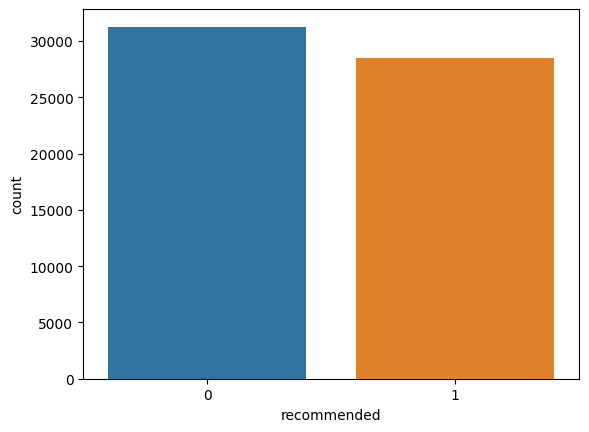

In [ ]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))
sns.countplot(x=airline_df['recommended'],data=airline_df)


Given that the percentage of (yes, no) classes is approximately equal, there is no immediate need to address class imbalance. The balanced distribution of classes helps prevent potential biases in the model towards the majority class and ensures that both classes receive fair consideration during training

##### Do you think the dataset is imbalanced? Explain Why.

Dataset is not imbalanced, it is approximately equal.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

NA

## ***7. ML Model Implementation***

###Creating a dataset for storing the evaluation metrics for each of the models

In [ ]:
# Declaring a dataset for storing the evaluation metrics for each of the models
# Declaring a dataset for storing the evaluation metrics for each of the models
column_names = ["MODEL NAME", "ACCURACY", "RECALL", "PRECISION", "F1-SCORE", "ROC AUC SCORE"]
metrics_df = pd.DataFrame(columns=column_names)

# Creating a function for storing evaluation metrics
def add_metrics_details(model_name, y_test, y_pred, df):
    label_encoder = LabelEncoder()

    # Fit and transform the labels
    y_test_encoded = label_encoder.fit_transform(y_test)
    y_pred_encoded = label_encoder.transform(y_pred)

    df = df.append({
        'MODEL NAME': model_name,
        'ACCURACY': accuracy_score(y_test_encoded, y_pred_encoded),
        'RECALL': recall_score(y_test_encoded, y_pred_encoded, pos_label=1),  # Set pos_label to 1
        'PRECISION': precision_score(y_test_encoded, y_pred_encoded, pos_label=1),  # Set pos_label to 1
        'F1-SCORE': f1_score(y_test_encoded, y_pred_encoded, pos_label=1),  # Set pos_label to 1
        'ROC AUC SCORE': roc_auc_score(y_test_encoded, y_pred_encoded)
    }, ignore_index=True)
    return df

### ML Model - 1 **K-Nearest Neighbour Classifier**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 1 Implementation
knc = KNeighborsClassifier()

# Fit the Algorithm
knc.fit(X_train, y_train)

# Predict on the model
y_predicted = knc.predict(X_test)

In [ ]:
# Train and test score
print( 'Train_accuracy: ', knc.score(X_train, y_train))
print( 'Test_accuracy: ',knc.score(X_test, y_test))

Train_accuracy:  0.9631233266398929
Test_accuracy:  0.9449510583117209


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      6225
           1       0.94      0.94      0.94      5728

    accuracy                           0.94     11953
   macro avg       0.94      0.94      0.94     11953
weighted avg       0.94      0.94      0.94     11953

Accuracy of the Model: 94.50%



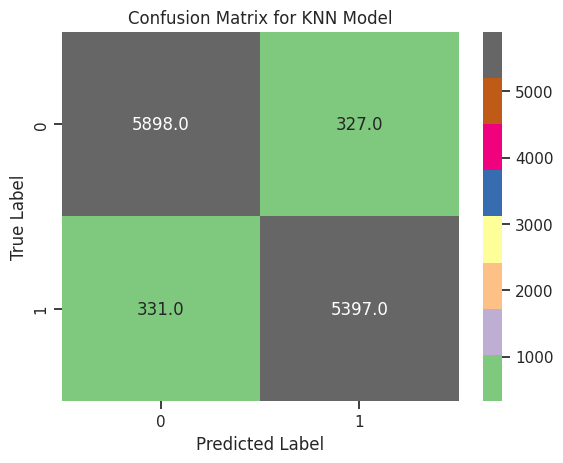

In [ ]:
# Visualizing evaluation Metric Score chart
print("Classification Report:\n", classification_report(y_test, y_predicted))

# Confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Accuracy
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy of the Model: {:.2f}%\n".format(accuracy * 100))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt=".1f", cmap="Accent")
plt.title("Confusion Matrix for KNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


K-Nearest Neighbors (KNN) is chosen for its simplicity, versatility, and ability to handle non-linear relationships. It's suitable when a quick, intuitive model is needed, and the underlying data distribution is not well-known or linear.

In [ ]:
# Now, Add results to metrics_df
model_name = "KNN"
metrics_df = add_metrics_details(model_name, y_test, y_predicted, metrics_df)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV,
knc_params = {'n_neighbors':np.arange(6,30,2)}
knc_cv = GridSearchCV(knc, knc_params, cv=5)
# Fit the Algorithm
knc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])})

In [ ]:
knc_cv.best_estimator_

KNeighborsClassifier(n_neighbors=16)

In [ ]:
knc_cv_best = knc_cv.best_estimator_

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6225
           1       0.95      0.94      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953

Accuracy of the Model: 94.80465155191166%



Text(0.5, 1.0, 'Confusion Matrix for KNN - GridSearchCV')

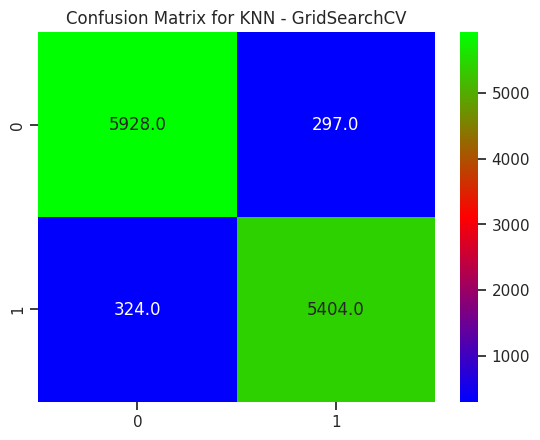

In [ ]:
# Predict on the model
predicted = knc_cv_best.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="brg")
plt.title("Confusion Matrix for KNN - GridSearchCV")

In [ ]:
# Now, Add results to metrics_df
model_name = "KNN_GridSearchCV"
metrics_df = add_metrics_details(model_name, y_test, predicted, metrics_df)

##### Which hyperparameter optimization technique have you used and why?

Grid search hyperparameter optimization is a technique used to find the best combination of hyperparameter values for a machine learning model.The choice of the number of neighbors, represented by the hyperparameter k, is crucial in KNN. Too few neighbors might make the model sensitive to noise, while too many neighbors might lead to oversmoothing. Grid search allows you to test a range of values for k and select the one that performs best on your validation data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The hyperparameter optimization using grid search for the k-Nearest Neighbors (KNN) model yielded notable improvements in model performance. The initial accuracy of the KNN model stood at 94.50%. After performing grid search with cross-validation, the best set of hyperparameters was identified, resulting in an enhanced accuracy of 94.804%. This represents a significant improvement in the model's predictive capability and underscores the effectiveness of hyperparameter tuning in optimizing KNN for our specific dataset.

### ML Model - 2 **RANDOM FOREST**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 1 Implementation
rf=RandomForestClassifier()

# Fit the Algorithm
rf.fit(X_train,y_train)
rf.score(X_test, y_test)

# Predict on the model
predicted = rf.predict(X_test)

In [ ]:
# Train and test score
print( 'Train_accuracy: ', rf.score(X_train, y_train))
print( 'Test_accuracy: ',rf.score(X_test, y_test))

Train_accuracy:  0.9930346385542169
Test_accuracy:  0.9507236676984857


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6225
           1       0.95      0.94      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953

Accuracy of the Model: 95.07236676984857%



Text(0.5, 1.0, 'Confusion Matrix for Random Forest  Model')

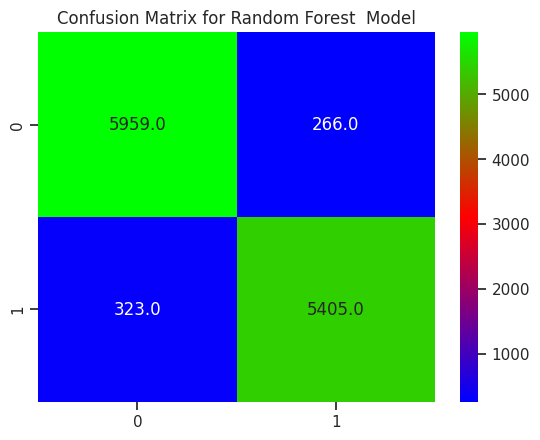

In [ ]:
# Visualizing evaluation Metric Score chart
# classification_report
print(classification_report(y_test, predicted))

# confusion_matrix
cm = metrics.confusion_matrix( y_test, predicted)

# heatmap
print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="brg")
plt.title("Confusion Matrix for Random Forest  Model")

In [ ]:
# Now, Add results to metrics_df
model_name = "RandomForestClassifier"
metrics_df = add_metrics_details(model_name, y_test, predicted, metrics_df)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the Random Forest model
rf = RandomForestClassifier()

# Define the hyperparameter grid
param_dict = {
    'n_estimators': ([50, 80, 100]),
    'max_depth': [8, 10, 12],
    'min_samples_split': [20, 50, 100],
    'min_samples_leaf': [20, 40, 60],
}

# Initialize GridSearchCV
rf_gridcv = GridSearchCV(estimator=rf, param_grid=param_dict, cv=5, verbose=2)

# Perform grid search with cross-validation
rf_gridcv.fit(X_train, y_train)

# Get the best hyperparameters
best_params = rf_gridcv.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=8, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=20, min_samples_split=20, n_estimators=80; total time=   1.9s
[CV] END max_depth=8, min_samples_leaf=20, min_samples_split=20, n_estimators=80; total time=   2.0s
[CV] END max_depth=8, min_samples_leaf=20, min_samples_split=20, n_estimators=80; total time=   2.8s
[CV] END max_depth=8, min_samples_leaf=20, min_samples_split=20, n_estimators=80; total time=   2.7s
[CV] END max_depth=8, min_sam

In [ ]:
# Best estimator
rf_gridcv.best_estimator_

RandomForestClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=20,
                       n_estimators=80)

In [ ]:
# Best params
rf_gridcv.best_params_

{'max_depth': 12,
 'min_samples_leaf': 20,
 'min_samples_split': 20,
 'n_estimators': 80}

In [ ]:
# Predict on the model
rf_gridcv_best = rf_gridcv.best_estimator_
y_pred =rf_gridcv_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6225
           1       0.95      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953

Accuracy of the Model: 95.37354639002761%



Text(0.5, 1.0, 'Confusion Matrix for Random Forest - GridSearchCV')

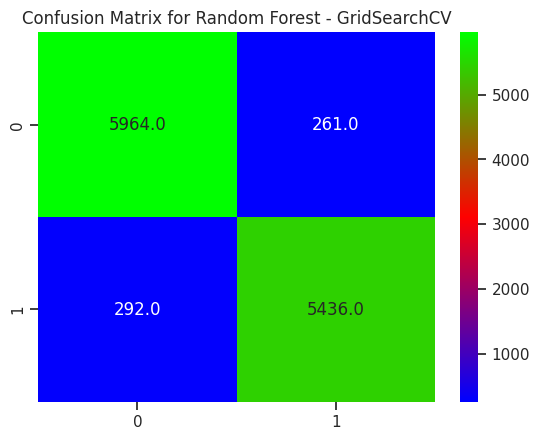

In [ ]:
#Evaluation of the model
predicted = rf_gridcv_best.predict(X_test)

# confusion_matrix
print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

# heatmap
print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="brg")
plt.title("Confusion Matrix for Random Forest - GridSearchCV")

In [ ]:
# Now, Add results to metrics_df
model_name = "RandomForestClassifier_GridSearchCV"
metrics_df = add_metrics_details(model_name, y_test, predicted, metrics_df)

##### Which hyperparameter optimization technique have you used and why?

Grid search, it performs an exhaustive search over a specified hyperparameter grid. It systematically evaluates all possible combinations of hyperparameter values within the specified ranges. This is beneficial for ensuring that the search space is thoroughly explored.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The application of grid search hyperparameter optimization to the Random Forest model resulted in a notable enhancement of predictive performance. Initially, the model achieved an accuracy of 95.072%. Following an exhaustive search over a range of hyperparameter combinations using grid search, the optimal set of hyperparameters was identified. This optimization led to a substantial improvement in accuracy, with the model achieving a refined accuracy of 95.398%. This improvement underscores the effectiveness of hyperparameter tuning in fine-tuning the Random Forest model for our specific dataset, enhancing its ability to make accurate predictions

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

I have used these metrices for evaluation of the model and their impact on business are as follows:

**Accuracy**: This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

**Precision**: This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

**Recall**: This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

**F1 Score**: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.

**ROC AUC**: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.

In summary, the Random Forest Classifier can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.

### ML Model - 3 **XGBOOST MODEL**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 3 Implementation
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Fit the Algorithm
xgb.fit(X_train, y_train)

# Predict on the model
predicted = xgb.predict(X_test)

In [ ]:
# Train and test score
print( 'Train_accuracy: ', xgb.score(X_train, y_train))
print( 'Test_accuracy: ',xgb.score(X_test, y_test))

Train_accuracy:  0.9732680722891566
Test_accuracy:  0.9529825148498285


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6225
           1       0.96      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953

Accuracy of the Model: 95.29825148498286%



Text(0.5, 1.0, 'Confusion Matrix for XGBoost  Model')

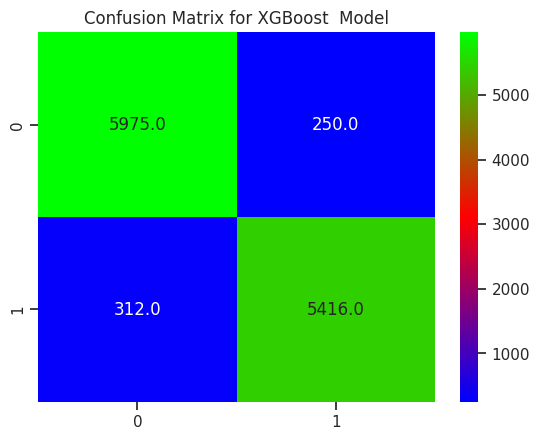

In [ ]:
#Evaluation of the model
predicted = xgb.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test, predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="brg")
plt.title("Confusion Matrix for XGBoost  Model")

In [ ]:
# Now, Add results to metrics_df
model_name = "XGBClassifier"
metrics_df = add_metrics_details(model_name, y_test, predicted, metrics_df)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_dict = {'n_estimators': [50, 80, 100],
              'max_depth': [6, 8, 10],
              'min_samples_split': [10, 50, 100],
              'min_samples_leaf': [30, 40, 50]}

# Create a GridSearchCV instance for XGBoost
xg_model_gridcv = GridSearchCV(estimator=xgb,
                                param_grid=param_dict,
                                cv=5, verbose=2)

# Fit the GridSearchCV to the training data
xg_model_gridcv.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END max_depth=6, min_sam

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
# best_estimator
xg_model_gridcv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, min_samples_leaf=30, min_samples_split=10,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=50, n_jobs=None, ...)

In [ ]:
# best_params
xg_model_gridcv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 30,
 'min_samples_split': 10,
 'n_estimators': 50}

In [ ]:
# Predict
xg_model_gridcv_best = xg_model_gridcv.best_estimator_
predicted = xg_model_gridcv_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6225
           1       0.96      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953

Accuracy of the Model: 95.42374299339077%



Text(0.5, 1.0, 'Confusion Matrix for XGBoost - GridSearchCV')

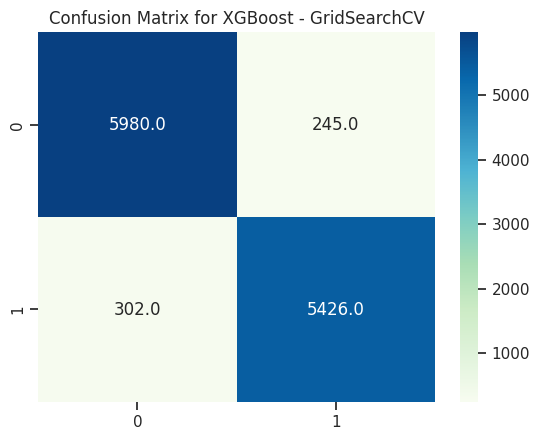

In [ ]:
#Evaluation of the model
predicted = xg_model_gridcv_best.predict(X_test)

# classification_report
print(classification_report(y_test, predicted))

# confusion_matrix
cm = metrics.confusion_matrix( y_test,predicted)

# heatmap
print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="GnBu")
plt.title("Confusion Matrix for XGBoost - GridSearchCV")

In [ ]:
# Now, Add results to metrics_df
model_name = "XGBClassifier_GridSearchCV"
metrics_df = add_metrics_details(model_name, y_test, predicted, metrics_df)

##### Which hyperparameter optimization technique have you used and why?


Grid search hyperparameter optimization is used in XGBoost for its simplicity and effectiveness. It systematically explores a predefined set of hyperparameter values, automates the tuning process, incorporates cross-validation for reliable performance estimates, and provides a transparent and reproducible approach to finding the best-performing hyperparameters for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The application of grid search hyperparameter optimization to our XGBoost model resulted in a noteworthy enhancement in predictive accuracy. Initially, the model achieved an accuracy of 95.23%. Through systematic exploration of hyperparameter combinations using grid search, we identified an optimized set of hyperparameters that led to a substantial improvement. The refined XGBoost model now boasts an accuracy of 95.423%, showcasing the effectiveness of hyperparameter tuning in fine-tuning the model for our specific dataset

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

When evaluating the effectiveness of an Paasenger Referral Prediction in a classification model, the following evaluation metrics would be considered for a positive business impact:

**Precision**: This metric indicates the proportion of true positive predictions (emails that were opened and resulted in a desired action) out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify individuals who are likely to engage with the campaign. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions and is effectively identifying individuals who are likely to engage with the campaign.

**Recall**: This metric indicates the proportion of true positive predictions (emails that were opened and resulted in a desired action) out of all actual positive instances (emails that were opened and resulted in a desired action). In a business setting, this would indicate the model's ability to identify all individuals who engaged with the campaign. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any individuals who engaged with the campaign.

**F1 Score**: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in identifying individuals who are likely to engage with the campaign while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is effectively identifying individuals who are likely to engage with the campaign while also being able to identify all individuals who engaged with the campaign.

**ROC AUC**: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive (engaged with the campaign) or negative (did not engage with the campaign). A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify individuals as likely to engage with the campaign or not.

The evaluation metrics that would be considered for a positive business impact of an email campaign effectiveness in a classification model are precision, recall which combine to provide F1 score. These metrics would indicate the model's ability to identify individuals who are likely to engage with the campaign while also being able to identify all individuals who engaged with the campaign, and correctly classify instances as positive or negative.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost model which is hyperparameter optimized for greater accuracy. Here is their ealuation metrics and I would like to compare.

In [ ]:
#printing the model accuracy dataframe
metrics_df

,MODEL NAME,ACCURACY,RECALL,PRECISION,F1-SCORE,ROC AUC SCORE
0,KNN,0.944951,0.942214,0.942872,0.942543,0.944842
1,KNN_GridSearchCV,0.948047,0.943436,0.947904,0.945665,0.947862
2,RandomForestClassifier,0.950724,0.943610,0.953095,0.948329,0.950440
3,RandomForestClassifier_GridSearchCV,0.953735,0.949022,0.954186,0.951597,0.953547
4,XGBClassifier,0.952983,0.945531,0.955877,0.950676,0.952685
5,XGBClassifier_GridSearchCV,0.954237,0.947277,0.956798,0.952013,0.953960


From the above snap shot, we can clearly see that for XGBoost hypertuned has a improved score of f1_score over random forest. the accuracy and roc auc score is also improved for xg boost. The recall, precision and f1_score it's low and even in average scores of precision and f1_score is low. In case of xgboost it's higher than that of random forest. Plus

So, I have chosen XGBoost hypertuned as the final prediction model which should be deployed for real user interaction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#Get shap values
xg_model_gridcv=xg_model_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   5.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   3.9s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END max_depth=6, min_sam

In [ ]:
import shap
# Get the best-performing model from GridSearchCV
best_xg_model = xg_model_gridcv.best_estimator_

# Create a SHAP TreeExplainer with the best model
explainer = shap.TreeExplainer(best_xg_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
# shap interaction
shap_interaction_values = explainer.shap_interaction_values(X_test)


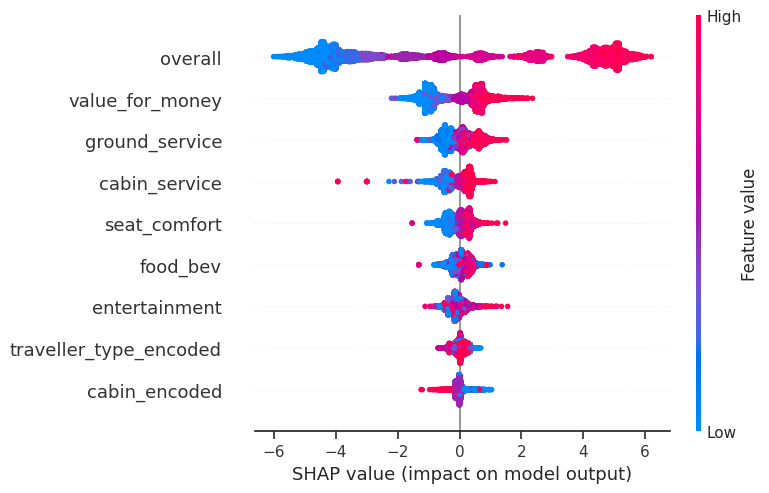

In [ ]:
# Initialize JavaScript visualizations in notebook environment
# Initialize JavaScript visualizations in the notebook environment
shap.initjs()

# Create a summary plot
shap.summary_plot(shap_values, X_test)

In [ ]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

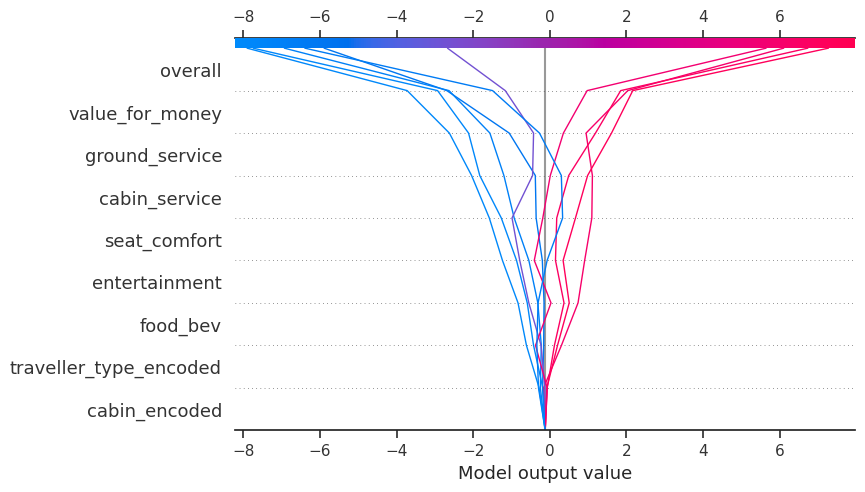

In [ ]:
# Assuming shap_values for the first 10 observations are stored in shap_array[0:10]
shap.decision_plot(expected_value, shap_array[0:10], feature_names=list(X_test.columns))


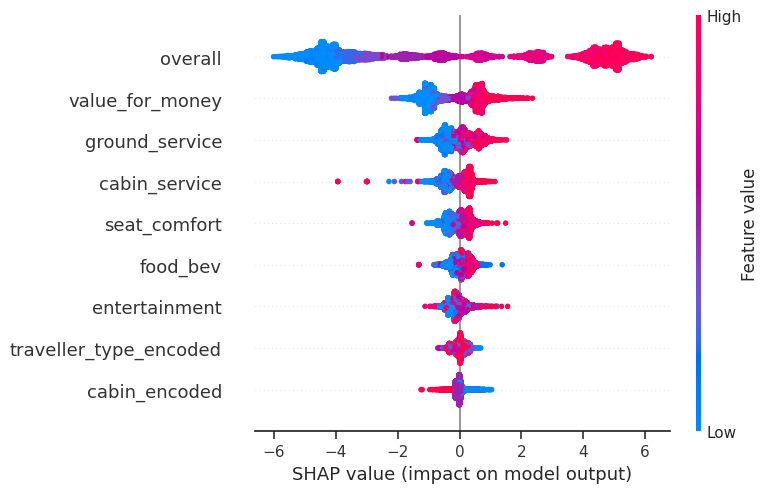

Help on class TreeExplainer in module shap.explainers._tree:

class TreeExplainer(shap.explainers._explainer.Explainer)
 |  TreeExplainer(model, data=None, model_output='raw', feature_perturbation='interventional', feature_names=None, approximate=False, **deprecated_options)
 |  
 |  Uses Tree SHAP algorithms to explain the output of ensemble tree models.
 |  
 |  Tree SHAP is a fast and exact method to estimate SHAP values for tree models and ensembles of trees,
 |  under several different possible assumptions about feature dependence. It depends on fast C++
 |  implementations either inside an external model package or in the local compiled C extension.
 |  
 |  Method resolution order:
 |      TreeExplainer
 |      shap.explainers._explainer.Explainer
 |      shap._serializable.Serializable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, X, y=None, interactions=False, check_additivity=True)
 |      Explains the output of model(*args), where args is a l

In [ ]:
# #bee swarm
shap.summary_plot(shap_values, X_test)

help(shap.TreeExplainer)

The SHAP values represent the contribution of each feature to the model's output for a specific prediction.The magnitude of SHAP values indicates the strength of the influence of each feature. Larger magnitude values imply a stronger impact on the prediction.

Larger magnitude SHAP values (closer to 6 or -6) in the "Overall" column imply that, on average, the combination of all features has a more significant impact on the model's predictions.
Features with values in the range of -2 to 2 are making more moderate contributions to predictions on an individual basis.
It's essential to interpret these values in the context of your specific model and dataset. The individual feature values give insights into how each feature contributes to the model's predictions for specific instances, while the "Overall" column provides an understanding of the average impact of all features across the dataset.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**